# **0. Importion**

In [1]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 124.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 142.2 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn━━━━━━━━━━━━ 0/4 [patsy]
    Found existing installation: scikit-learn 1.3.232m0/4 [patsy]
    Uninstalling scikit-learn-1.3.2:━━━━━━━━ 0/4 [patsy]
      Successfully uninstalled scikit-learn-1.3.2━━━━━━━━━━━━━━━━━ 1/4 [scikit-learn]
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [category_encoders]statsmodels]]
Note: you may need to restart the kernel to use updated packages.


In [2]:
!pip install seaborn tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.8/644.8 MB 114.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 141.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 158.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 136.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 76.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 217.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 127.9 MB/s eta 0:00:00
  Attempting uninstall: tensorboard0m╸━━━━━━━━━━━━━━ 11/17 [gast]ypes]-io-gcs-filesystem]
    Found existing installation: tensorboard 2.15.1━━━━━━━━━━━ 11/17 [gast]
    Uninstalling tensorboard-2.15.1:1m╸━━━━━━━━━━━━━━ 11/17 [gast]
      Successfully uninstalled tensorboard-2.15.1━━━━━━━━━━━━━ 11/17 [gast]
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17/17 [tensorflow]7 [tensorflow]]


In [1]:
# Standard Library
import random
from datetime import datetime

# Third-Party Data Handling
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-Learn
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    roc_auc_score
)
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import roc_curve, precision_recall_curve
# Gradient Boosting
import xgboost as xgb

# TensorFlow/Keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, SimpleRNN
from tensorflow.keras.optimizers import Adam, RMSprop, Nadam
from tensorflow.keras.optimizers.legacy import Adam as LegacyAdam
from tensorflow.keras.utils import set_random_seed
from tensorflow.keras.callbacks import EarlyStopping

# Specialized Encoders
from category_encoders import TargetEncoder

2025-06-20 23:04:58.611631: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-06-20 23:04:58.713154: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750460698.755273    2467 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750460698.767420    2467 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1750460698.851560    2467 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

# **1. Load Dataset**

In [2]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "credit_card_fraud_detection.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "abdelrahmanmahmoud22/imbalanced-credit-card-frud-detection",
  file_path,
)

print("First 5 records:", df.head())

/tmp/ipykernel_2467/2633758484.py:8: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


First 5 records:   trans_date_trans_time            cc_num                      merchant  \
0   2019-01-01 00:00:18  2703186189652095          Rippin, Kub and Mann   
1   2019-01-01 00:00:44      630423337322     Heller, Gutmann and Zieme   
2   2019-01-01 00:00:51    38859492057661                Lind-Buckridge   
3   2019-01-01 00:01:16  3534093764340240  Kutch, Hermiston and Farrell   
4   2019-01-01 00:03:06   375534208663984                 Keeling-Crist   

        category     amt  gender state  city_pop  \
0       misc_net    4.97       1    NC      3495   
1    grocery_pos  107.25       1    WA       149   
2  entertainment  220.10       0    ID      4154   
3  gas_transport   45.00       0    MT      1939   
4       misc_pos   41.97       0    VA        99   

                          trans_num  is_fraud           Region  \
0  0b242abb623afc578575680df30655b9         0            South   
1  1f76529f8574734946361c461b024d99         0         Far West   
2  a1a22d70485983eac1

# **2. Feture Engineering**

In [3]:
# Ensure trans_date_trans_time is datetime
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
# Filter adults
df = df[df['age'] >= 18]

# Equal frequency binning for age
num_bins = 4
age_labels = ['Young', 'Middle-aged', 'Senior', 'Elder']
df['age_group'] = pd.qcut(df['age'], q=num_bins, labels=age_labels)

# Is it weekend?
df["is_weekend"] = df["trans_date_trans_time"].dt.day_name().apply(lambda x: int((x == "Sunday") | (x == "Saturday")))

# Day period
def day_period(x):
    if 0 <= x < 6: return "Night"
    elif 6 <= x < 12: return "Morning"
    elif 12 <= x < 18: return "Afternoon"
    elif 18 <= x < 24: return "Evening"

df["day_period"] = df["trans_date_trans_time"].dt.hour.apply(day_period)

# Extract month and day name
df["trans_year"] = pd.Series(pd.to_datetime(df.trans_date_trans_time)).dt.year
df["trans_month"] = df["trans_date_trans_time"].dt.month_name()
df['day_name'] = df['trans_date_trans_time'].dt.day_name()

# Flag new merchants per credit card number
df['is_new_merchant'] = df.groupby('cc_num')['merchant'].transform(lambda x: (~x.duplicated()).astype(int))

# **3. Transformation**

In [4]:
X = df.drop(columns=['is_fraud'], axis=1)
y = df['is_fraud']

# Identify columns
num_cols = ['amt', 'city_pop', 'age', 'trans_year']
high_card_cols = ['merchant', 'category', 'job_category','state']
low_card_cols = ['Region', 'day_period', 'age_group', 'trans_month', 'day_name']
ready_cols = ['gender', 'is_weekend']


encoder = TargetEncoder()
X_high = encoder.fit_transform(X[high_card_cols], y)


X_low = pd.get_dummies(X[low_card_cols], drop_first=True)


scaler = StandardScaler()
X_num = pd.DataFrame(scaler.fit_transform(X[num_cols]), columns=num_cols, index=X.index)


X_ready = X[ready_cols].copy()


X_processed = pd.concat([X_num, X_high, X_low, X_ready], axis=1)

# **4. Splitting the data**

In [5]:
def set_seed(seed=42):
    random.seed(seed)                    # Python random seed
    np.random.seed(seed)                 # NumPy random seed
    tf.random.set_seed(seed)             # TensorFlow random seed

In [6]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.3, random_state=42)

# **5. Modelling**

## 5.0 Model Evaluation functions

In [7]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_curve,
    roc_auc_score,
    precision_recall_curve
)

#### **5.0.1 Machine Learning Evaluatoin function**

In [8]:
def evaluate_model(model, X_train, y_train, X_test, y_test, model_name="Model",
                   save_individual_charts=False, output_dir='evaluation_reports'):
    """
    Generates a comprehensive evaluation report for a classification model,
    including a dashboard of plots and optional saving of individual charts.

    Args:
        model: The trained classification model.
        X_train, y_train: Training data and labels.
        X_test, y_test: Test data and labels.
        model_name (str): The name of the model for titles and filenames.
        save_individual_charts (bool): If True, saves each plot as a separate
                                       image file in a dedicated directory.
        output_dir (str): The parent directory to save the report folder in.
    """
    # --- 1. PREDICTIONS & METRICS ---
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    y_test_proba = model.predict_proba(X_test)[:, 1]
    y_train_proba = model.predict_proba(X_train)[:, 1]

    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    roc_auc = roc_auc_score(y_test, y_test_proba)
    report_dict = classification_report(y_test, y_test_pred, output_dict=True)

    # --- 2. DIRECTORY SETUP FOR SAVING CHARTS (NEW FEATURE) ---
    report_path = None
    if save_individual_charts:
        # Sanitize model_name for use in a directory path
        sanitized_model_name = model_name.replace(" ", "_").lower()
        report_path = os.path.join(output_dir, sanitized_model_name)
        os.makedirs(report_path, exist_ok=True)
        print(f"Saving individual charts to: {report_path}")

    # --- 3. CREATE THE MAIN 3x3 DASHBOARD ---
    fig_main, axes = plt.subplots(3, 3, figsize=(20, 15))
    fig_main.suptitle(f"{model_name} Evaluation Dashboard", fontsize=16, y=1.02)
    
    # Flatten axes for easier iteration if needed, but direct indexing is fine
    ax = axes.ravel()

    # --- Plot 1: Confusion Matrix ---
    cm = confusion_matrix(y_test, y_test_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=ax[0])
    ax[0].set_title("Confusion Matrix")
    ax[0].set_xlabel("Predicted")
    ax[0].set_ylabel("Actual")
    if save_individual_charts:
        fig, ax_single = plt.subplots()
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=ax_single)
        ax_single.set_title("Confusion Matrix")
        ax_single.set_xlabel("Predicted")
        ax_single.set_ylabel("Actual")
        fig.savefig(os.path.join(report_path, '1_confusion_matrix.png'))
        plt.close(fig)

    # --- Plot 2: ROC Curve ---
    fpr, tpr, _ = roc_curve(y_test, y_test_proba)
    ax[1].plot(fpr, tpr, label=f"AUC = {roc_auc:.4f}")
    ax[1].plot([0, 1], [0, 1], 'k--')
    ax[1].set_xlabel("False Positive Rate")
    ax[1].set_ylabel("True Positive Rate")
    ax[1].set_title("ROC Curve")
    ax[1].legend()
    if save_individual_charts:
        fig, ax_single = plt.subplots()
        ax_single.plot(fpr, tpr, label=f"AUC = {roc_auc:.4f}")
        ax_single.plot([0, 1], [0, 1], 'k--')
        ax_single.set_xlabel("False Positive Rate")
        ax_single.set_ylabel("True Positive Rate")
        ax_single.set_title("ROC Curve")
        ax_single.legend()
        fig.savefig(os.path.join(report_path, '2_roc_curve.png'))
        plt.close(fig)

    # --- Plot 3: Precision-Recall Curve ---
    precision, recall, _ = precision_recall_curve(y_test, y_test_proba)
    ax[2].plot(recall, precision, color='darkorange')
    ax[2].set_xlabel("Recall")
    ax[2].set_ylabel("Precision")
    ax[2].set_title("Precision-Recall Curve")
    if save_individual_charts:
        fig, ax_single = plt.subplots()
        ax_single.plot(recall, precision, color='darkorange')
        ax_single.set_xlabel("Recall")
        ax_single.set_ylabel("Precision")
        ax_single.set_title("Precision-Recall Curve")
        fig.savefig(os.path.join(report_path, '3_precision_recall_curve.png'))
        plt.close(fig)

    # --- Plot 4: Cumulative Gains Chart ---
    sorted_idx = np.argsort(-y_test_proba)
    gains_y = np.array(y_test)[sorted_idx]
    cumulative_gains = np.cumsum(gains_y) / np.sum(gains_y)
    percentage_samples = np.arange(1, len(gains_y) + 1) / len(gains_y)
    ax[3].plot(percentage_samples, cumulative_gains, label="Model")
    ax[3].plot([0, 1], [0, 1], linestyle='--', label="Baseline")
    ax[3].set_xlabel("Proportion of Samples")
    ax[3].set_ylabel("Proportion of Positives Captured")
    ax[3].set_title("Cumulative Gains Chart")
    ax[3].legend()
    if save_individual_charts:
        fig, ax_single = plt.subplots()
        ax_single.plot(percentage_samples, cumulative_gains, label="Model")
        ax_single.plot([0, 1], [0, 1], linestyle='--', label="Baseline")
        ax_single.set_xlabel("Proportion of Samples")
        ax_single.set_ylabel("Proportion of Positives Captured")
        ax_single.set_title("Cumulative Gains Chart")
        ax_single.legend()
        fig.savefig(os.path.join(report_path, '4_cumulative_gains_chart.png'))
        plt.close(fig)

    # --- Plot 5: Predicted Probability Distribution ---
    sns.histplot(y_test_proba, bins=50, kde=True, ax=ax[4])
    ax[4].set_title("Predicted Probability Distribution")
    ax[4].set_xlabel("Predicted Probability")
    ax[4].set_ylabel("Frequency")
    if save_individual_charts:
        fig, ax_single = plt.subplots()
        sns.histplot(y_test_proba, bins=50, kde=True, ax=ax_single)
        ax_single.set_title("Predicted Probability Distribution")
        ax_single.set_xlabel("Predicted Probability")
        ax_single.set_ylabel("Frequency")
        fig.savefig(os.path.join(report_path, '5_probability_distribution.png'))
        plt.close(fig)

    # --- Plot 6: Overfitting Check (Accuracy) ---
    ax[5].bar(['Train', 'Test'], [train_acc, test_acc], color=['blue', 'orange'])
    ax[5].set_title("Accuracy Comparison")
    ax[5].set_ylim(0, 1)
    if save_individual_charts:
        fig, ax_single = plt.subplots()
        ax_single.bar(['Train', 'Test'], [train_acc, test_acc], color=['blue', 'orange'])
        ax_single.set_title("Accuracy Comparison")
        ax_single.set_ylim(0, 1)
        fig.savefig(os.path.join(report_path, '6_accuracy_comparison.png'))
        plt.close(fig)

    # --- Plot 7: Classification Report Table ---
    # Hide the axes for the table subplot
    ax[6].axis('off')
    ax[7].axis('off')
    ax[8].axis('off')
    
    # Create the table in the last subplot space
    report_ax = fig_main.add_subplot(3, 3, (7, 9))
    report_ax.axis('off')
    
    # Prepare data for the table
    metrics = ['precision', 'recall', 'f1-score', 'support']
    classes = list(report_dict.keys())[:-3]
    cell_text = [[f"{report_dict[cls].get(m, ''):.2f}" if isinstance(report_dict[cls].get(m), float) else report_dict[cls].get(m, '') for m in metrics] for cls in classes]
    avg_names = ['macro avg', 'weighted avg']
    for name in avg_names:
        row = [f"{report_dict[name][metric]:.2f}" for metric in metrics[:-1]] + [int(report_dict[name]['support'])]
        cell_text.append(row)

    table = report_ax.table(cellText=cell_text,
                          rowLabels=classes + avg_names,
                          colLabels=metrics,
                          loc='center',
                          cellLoc='center')
    
    table.auto_set_font_size(False)
    table.set_fontsize(12)
    table.scale(1, 1.5)
    report_ax.set_title("Classification Report (Class 1 Highlighted)", fontsize=14, pad=20)
    
    # Style table
    class_1_label = '1' if '1' in classes else ('positive' if 'positive' in classes else None)
    if class_1_label:
        class_1_idx = classes.index(class_1_label)
        for j in range(len(metrics)):
            table[(class_1_idx + 1, j)].set_facecolor('#FFFACD')
            table[(class_1_idx + 1, j)].set_fontsize(14)
    for j in range(len(metrics)):
        table[(0, j)].set_facecolor('#E6E6FA')

    if save_individual_charts:
        # For saving, create a dedicated figure for the table
        fig_table, ax_table = plt.subplots(figsize=(8, 4)) # Adjust size as needed
        ax_table.axis('off')
        # Re-create the table on the new axes
        table__single = ax_table.table(cellText=cell_text,
                                    rowLabels=classes + avg_names, colLabels=metrics,
                                    loc='center', cellLoc='center')
        table_single.auto_set_font_size(False)
        table_single.set_fontsize(12)
        table_single.scale(1, 1.5)
        # Re-apply styles
        if class_1_label:
            class_1_idx = classes.index(class_1_label)
            for j in range(len(metrics)):
                table_single[(class_1_idx + 1, j)].set_facecolor('#FFFACD')
                table_single[(class_1_idx + 1, j)].set_fontsize(14)
        for j in range(len(metrics)):
            table_single[(0, j)].set_facecolor('#E6E6FA')

        ax_table.set_title("Classification Report", fontsize=14, pad=20)
        fig_table.tight_layout()
        fig_table.savefig(os.path.join(report_path, '7_classification_report.png'))
        plt.close(fig_table)


    # --- 4. FINALIZE AND SHOW DASHBOARD & PRINT METRICS ---
    fig_main.tight_layout(rect=[0, 0, 1, 0.96]) # Adjust layout to make room for suptitle
    plt.show()

    # Print summary
    print(f"\n{model_name} Classification Report:\n")
    print(classification_report(y_test, y_test_pred))
    print(f"{model_name} ROC AUC Score: {roc_auc:.4f}")
    print(f"{model_name} Train Accuracy: {train_acc:.4f}")
    print(f"{model_name} Test Accuracy:  {test_acc:.4f}")

    diff = train_acc - test_acc
    if diff > 0.05: # Using a 5% threshold
        print(f"Potential overfitting: Training accuracy is higher by {diff:.2%}")
    elif diff < -0.05:
        print(f"Potential underfitting or data issue: Test accuracy is higher by {-diff:.2%}")
    else:
        print("No significant overfitting/underfitting detected.")

#### **5.0.2 Neural Network Evaluatoin function**

In [9]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_curve,
    roc_auc_score,
    precision_recall_curve
)
# Make sure you have tensorflow/keras installed for the example
# pip install tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def evaluate_nn_model(model, X_train, y_train, X_test, y_test, model_name="Neural Network",
                      history=None, save_individual_charts=False, output_dir='evaluation_reports'):
    """
    Generates a comprehensive evaluation report for a Neural Network model,
    including a dashboard of plots and optional saving of individual charts.

    Args:
        model: The trained Keras/TensorFlow model.
        X_train, y_train: Training data and labels.
        X_test, y_test: Test data and labels.
        model_name (str): The name of the model for titles and filenames.
        history: The history object returned from model.fit().
        save_individual_charts (bool): If True, saves each plot as a separate
                                       image file in a dedicated directory.
        output_dir (str): The parent directory to save the report folder in.
    """
    # --- 1. PREDICTIONS & METRICS ---
    # Note: Flatten is important for Keras's output shape (batch_size, 1)
    y_test_proba = model.predict(X_test).flatten()
    y_train_proba = model.predict(X_train).flatten()
    y_test_pred = (y_test_proba > 0.5).astype("int32")
    y_train_pred = (y_train_proba > 0.5).astype("int32")

    # Calculate metrics
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    roc_auc = roc_auc_score(y_test, y_test_proba)

    # --- 2. DIRECTORY SETUP FOR SAVING CHARTS ---
    report_path = None
    if save_individual_charts:
        sanitized_model_name = model_name.replace(" ", "_").lower()
        report_path = os.path.join(output_dir, sanitized_model_name)
        os.makedirs(report_path, exist_ok=True)
        print(f"Saving individual charts to: {report_path}")

    # --- 3. CREATE THE MAIN 3x3 DASHBOARD ---
    fig_main, axes = plt.subplots(3, 3, figsize=(20, 16))
    fig_main.suptitle(f"{model_name} Evaluation Dashboard", fontsize=16, y=1.02)
    ax = axes.ravel() # Flatten the 3x3 grid to a 1D array of 9 axes

    # --- Plot 1: Confusion Matrix ---
    cm = confusion_matrix(y_test, y_test_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=ax[0])
    ax[0].set_title("Confusion Matrix")
    ax[0].set_xlabel("Predicted")
    ax[0].set_ylabel("Actual")
    if save_individual_charts:
        fig, ax_single = plt.subplots()
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=ax_single)
        ax_single.set_title("Confusion Matrix")
        ax_single.set_xlabel("Predicted")
        ax_single.set_ylabel("Actual")
        fig.savefig(os.path.join(report_path, '1_confusion_matrix.png'))
        plt.close(fig)

    # --- Plot 2: ROC Curve ---
    fpr, tpr, _ = roc_curve(y_test, y_test_proba)
    ax[1].plot(fpr, tpr, label=f"AUC = {roc_auc:.4f}")
    ax[1].plot([0, 1], [0, 1], 'k--')
    ax[1].set_xlabel("False Positive Rate")
    ax[1].set_ylabel("True Positive Rate")
    ax[1].set_title("ROC Curve")
    ax[1].legend()
    if save_individual_charts:
        fig, ax_single = plt.subplots()
        ax_single.plot(fpr, tpr, label=f"AUC = {roc_auc:.4f}")
        ax_single.plot([0, 1], [0, 1], 'k--')
        ax_single.set_xlabel("False Positive Rate")
        ax_single.set_ylabel("True Positive Rate")
        ax_single.set_title("ROC Curve")
        ax_single.legend()
        fig.savefig(os.path.join(report_path, '2_roc_curve.png'))
        plt.close(fig)

    # --- Plot 3: Precision-Recall Curve ---
    precision, recall, _ = precision_recall_curve(y_test, y_test_proba)
    ax[2].plot(recall, precision, color='darkorange')
    ax[2].set_xlabel("Recall")
    ax[2].set_ylabel("Precision")
    ax[2].set_title("Precision-Recall Curve")
    if save_individual_charts:
        fig, ax_single = plt.subplots()
        ax_single.plot(recall, precision, color='darkorange')
        ax_single.set_xlabel("Recall")
        ax_single.set_ylabel("Precision")
        ax_single.set_title("Precision-Recall Curve")
        fig.savefig(os.path.join(report_path, '3_precision_recall_curve.png'))
        plt.close(fig)

    # --- Plot 4: Cumulative Gains Chart ---
    sorted_idx = np.argsort(-y_test_proba)
    gains_y = np.array(y_test)[sorted_idx]
    cumulative_gains = np.cumsum(gains_y) / np.sum(gains_y)
    percentage_samples = np.arange(1, len(gains_y) + 1) / len(gains_y)
    ax[3].plot(percentage_samples, cumulative_gains, label="Model")
    ax[3].plot([0, 1], [0, 1], linestyle='--', label="Baseline")
    ax[3].set_xlabel("Proportion of Samples")
    ax[3].set_ylabel("Proportion of Positives Captured")
    ax[3].set_title("Cumulative Gains Chart")
    ax[3].legend()
    if save_individual_charts:
        fig, ax_single = plt.subplots()
        ax_single.plot(percentage_samples, cumulative_gains, label="Model")
        ax_single.plot([0, 1], [0, 1], linestyle='--', label="Baseline")
        ax_single.set_xlabel("Proportion of Samples")
        ax_single.set_ylabel("Proportion of Positives Captured")
        ax_single.set_title("Cumulative Gains Chart")
        ax_single.legend()
        fig.savefig(os.path.join(report_path, '4_cumulative_gains_chart.png'))
        plt.close(fig)

    # --- Plot 5: Predicted Probability Distribution ---
    sns.histplot(y_test_proba, bins=50, kde=True, ax=ax[4])
    ax[4].set_title("Predicted Probability Distribution")
    ax[4].set_xlabel("Predicted Probability")
    ax[4].set_ylabel("Frequency")
    if save_individual_charts:
        fig, ax_single = plt.subplots()
        sns.histplot(y_test_proba, bins=50, kde=True, ax=ax_single)
        ax_single.set_title("Predicted Probability Distribution")
        ax_single.set_xlabel("Predicted Probability")
        ax_single.set_ylabel("Frequency")
        fig.savefig(os.path.join(report_path, '5_probability_distribution.png'))
        plt.close(fig)

    # --- Plots 6 & 7: Accuracy/Loss History (if available) ---
    if history is not None:
        # Accuracy history
        ax[5].plot(history.history['accuracy'], label='Train Accuracy')
        if 'val_accuracy' in history.history:
            ax[5].plot(history.history['val_accuracy'], label='Validation Accuracy')
        ax[5].set_title('Model Accuracy over Epochs')
        ax[5].set_ylabel('Accuracy')
        ax[5].set_xlabel('Epoch')
        ax[5].legend()
        if save_individual_charts:
            fig, ax_single = plt.subplots()
            ax_single.plot(history.history['accuracy'], label='Train Accuracy')
            if 'val_accuracy' in history.history:
                ax_single.plot(history.history['val_accuracy'], label='Validation Accuracy')
            ax_single.set_title('Model Accuracy over Epochs')
            ax_single.set_ylabel('Accuracy')
            ax_single.set_xlabel('Epoch')
            ax_single.legend()
            fig.savefig(os.path.join(report_path, '6_training_accuracy.png'))
            plt.close(fig)

        # Loss history
        ax[6].plot(history.history['loss'], label='Train Loss')
        if 'val_loss' in history.history:
            ax[6].plot(history.history['val_loss'], label='Validation Loss')
        ax[6].set_title('Model Loss over Epochs')
        ax[6].set_ylabel('Loss')
        ax[6].set_xlabel('Epoch')
        ax[6].legend()
        if save_individual_charts:
            fig, ax_single = plt.subplots()
            ax_single.plot(history.history['loss'], label='Train Loss')
            if 'val_loss' in history.history:
                ax_single.plot(history.history['val_loss'], label='Validation Loss')
            ax_single.set_title('Model Loss over Epochs')
            ax_single.set_ylabel('Loss')
            ax_single.set_xlabel('Epoch')
            ax_single.legend()
            fig.savefig(os.path.join(report_path, '7_training_loss.png'))
            plt.close(fig)

    # --- Plot 8: Overfitting Check ---
    ax[7].bar(['Train', 'Test'], [train_acc, test_acc], color=['blue', 'orange'])
    ax[7].set_title("Final Accuracy Comparison")
    ax[7].set_ylim(0, 1)
    if save_individual_charts:
        fig, ax_single = plt.subplots()
        ax_single.bar(['Train', 'Test'], [train_acc, test_acc], color=['blue', 'orange'])
        ax_single.set_title("Final Accuracy Comparison")
        ax_single.set_ylim(0, 1)
        fig.savefig(os.path.join(report_path, '8_accuracy_comparison.png'))
        plt.close(fig)

    # Hide any unused subplots
    for i in range(len(ax)):
        if not ax[i].has_data():
            ax[i].axis('off')

    # --- 4. FINALIZE AND SHOW DASHBOARD & PRINT METRICS ---
    fig_main.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

    # Print summary
    print(f"\n{model_name} Classification Report:\n")
    print(classification_report(y_test, y_test_pred))
    print(f"{model_name} ROC AUC Score: {roc_auc:.4f}")
    print(f"Final Train Accuracy: {train_acc:.4f}")
    print(f"Final Test Accuracy:  {test_acc:.4f}")

    diff = train_acc - test_acc
    if diff > 0.05: # Using a 5% threshold
        print(f"Potential overfitting: Training accuracy is higher by {diff:.2%}")
    elif diff < -0.05:
        print(f"Potential underfitting or data issue: Test accuracy is higher by {-diff:.2%}")
    else:
        print("No significant overfitting/underfitting detected.")

#### **5.0.3 LSTM Evaluatoin function**

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_curve,
    roc_auc_score,
    precision_recall_curve,
)

def evaluate_sequences_model(model, X_train_seq, y_train_labels, X_test_seq, y_test_labels, history=None, model_name="Sequence Model"):
    """
    Provides a comprehensive evaluation for a trained Keras sequence model (LSTM, GRU, RNN).

    Args:
        model (keras.Model): The trained Keras model.
        X_train_seq (np.array): Training data, must be in 3D sequence format (samples, timesteps, features).
        y_train_labels (np.array): Training labels.
        X_test_seq (np.array): Test data, must be in 3D sequence format.
        y_test_labels (np.array): Test labels.
        history (keras.callbacks.History, optional): History object from model.fit(). Defaults to None.
        model_name (str, optional): Name of the model for titles. Defaults to "Sequence Model".
    """
    print(f"--- Evaluating {model_name} ---")

    # 1. --- EFFICIENT PREDICTIONS ---
    # Get predicted probabilities once and derive labels from them
    y_test_proba = model.predict(X_test_seq).flatten()
    y_train_proba = model.predict(X_train_seq).flatten()
    
    y_test_pred = (y_test_proba > 0.5).astype("int32")
    y_train_pred = (y_train_proba > 0.5).astype("int32")

    # 2. --- CLASSIFICATION METRICS ---
    train_acc = accuracy_score(y_train_labels, y_train_pred)
    test_acc = accuracy_score(y_test_labels, y_test_pred)
    roc_auc = roc_auc_score(y_test_labels, y_test_proba)
    
    print(f"\n{model_name} Classification Report:\n")
    print(classification_report(y_test_labels, y_test_pred))

    # 3. --- VISUALIZATIONS ---
    # Determine grid size based on whether history is available
    if history is not None:
        fig, axes = plt.subplots(2, 4, figsize=(24, 12))
        axes = axes.flatten()
    else:
        fig, axes = plt.subplots(2, 3, figsize=(18, 10))
        axes = axes.flatten()

    # Plot 1: Confusion Matrix
    cm = confusion_matrix(y_test_labels, y_test_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=axes[0])
    axes[0].set_title(f"Confusion Matrix")
    axes[0].set_xlabel("Predicted")
    axes[0].set_ylabel("Actual")

    # Plot 2: ROC Curve
    fpr, tpr, _ = roc_curve(y_test_labels, y_test_proba)
    axes[1].plot(fpr, tpr, label=f"AUC = {roc_auc:.4f}")
    axes[1].plot([0, 1], [0, 1], 'k--')
    axes[1].set_xlabel("False Positive Rate")
    axes[1].set_ylabel("True Positive Rate")
    axes[1].set_title(f"ROC Curve")
    axes[1].legend()

    # Plot 3: Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(y_test_labels, y_test_proba)
    axes[2].plot(recall, precision, color='darkorange')
    axes[2].set_xlabel("Recall")
    axes[2].set_ylabel("Precision")
    axes[2].set_title(f"Precision-Recall Curve")

    # Plot 4: Cumulative Gains Chart
    # Sort probabilities and true labels
    sorted_indices = np.argsort(y_test_proba)[::-1]
    sorted_y_test = y_test_labels[sorted_indices]
    cumulative_gains = np.cumsum(sorted_y_test) / np.sum(sorted_y_test)
    percentage_samples = np.linspace(0, 1, len(cumulative_gains))
    axes[3].plot(percentage_samples, cumulative_gains, label="Model")
    axes[3].plot([0, 1], [0, 1], linestyle='--', color='grey', label="Baseline")
    axes[3].set_xlabel("Proportion of Samples")
    axes[3].set_ylabel("Proportion of Positives Captured")
    axes[3].set_title(f"Cumulative Gains Chart")
    axes[3].legend()

    # Plot 5: Predicted Probability Distribution
    sns.histplot(y_test_proba, bins=50, kde=True, ax=axes[4])
    axes[4].set_title(f"Predicted Probability Distribution")
    axes[4].set_xlabel("Predicted Probability")
    axes[4].set_ylabel("Frequency")

    # Plot 6: Overfitting Check (Train vs. Test Accuracy)
    axes[5].bar(['Train', 'Test'], [train_acc, test_acc], color=['#1f77b4', '#ff7f0e'])
    axes[5].set_title(f"Accuracy: Train vs. Test")
    axes[5].set_ylim(0, 1.05)
    for i, acc in enumerate([train_acc, test_acc]):
        axes[5].text(i, acc + 0.02, f"{acc:.2%}", ha='center', fontweight='bold')

    # Plots 7 & 8: Training History (if available)
    if history is not None:
        # Accuracy History
        axes[6].plot(history.history['accuracy'], label='Train Accuracy')
        axes[6].plot(history.history['val_accuracy'], label='Validation Accuracy')
        axes[6].set_title(f'Accuracy over Epochs')
        axes[6].set_xlabel('Epoch')
        axes[6].set_ylabel('Accuracy')
        axes[6].legend()
        axes[6].grid(True, alpha=0.3)

        # Loss History
        axes[7].plot(history.history['loss'], label='Train Loss')
        axes[7].plot(history.history['val_loss'], label='Validation Loss')
        axes[7].set_title(f'Loss over Epochs')
        axes[7].set_xlabel('Epoch')
        axes[7].set_ylabel('Loss')
        axes[7].legend()
        axes[7].grid(True, alpha=0.3)
    
    # In case there are more axes than plots (when history is None)
    for i in range(len(axes)):
        if not axes[i].has_data():
            fig.delaxes(axes[i])

    fig.suptitle(f"{model_name} - Comprehensive Evaluation", fontsize=20)
    fig.tight_layout(rect=[0, 0.03, 1, 0.97])
    plt.show()

    # 4. --- FINAL METRICS & ANALYSIS ---
    print(f"\n{model_name} Final Metrics:")
    print(f"-> ROC AUC Score: {roc_auc:.4f}")
    print(f"-> Train Accuracy: {train_acc:.4f}")
    print(f"-> Test Accuracy:  {test_acc:.4f}")
    
    diff = train_acc - test_acc
    if diff > 0.05: # A 5% threshold is often reasonable
        print(f"-> Potential Overfitting: Training accuracy is higher by {diff:.2%}")
    elif diff < -0.03:
        print(f"-> Potential Data Mismatch or Underfitting: Test accuracy is higher by {-diff:.2%}")
    else:
        print("-> Good Generalization: Training and test accuracies are close.")

#### **5.0.4 RNN Evaluatoin function**

In [11]:
def evaluate_rnn_model(model, X_train_scaled, y_train, X_test_scaled, y_test, history=None, model_name="RNN Model"):
    # Reshape input for RNN: (samples, timesteps, features=1)
    X_train_rnn = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
    X_test_rnn = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

    # Predict class labels
    y_test_pred = (model.predict(X_test_rnn) > 0.5).astype("int32").flatten()
    y_train_pred = (model.predict(X_train_rnn) > 0.5).astype("int32").flatten()

    # Predicted probabilities
    y_test_proba = model.predict(X_test_rnn).flatten()
    y_train_proba = model.predict(X_train_rnn).flatten()

    # Accuracy scores
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    print(f"\n{model_name} Classification Report:\n")
    print(classification_report(y_test, y_test_pred))

    # Create a single comprehensive figure with all evaluation plots
    # Adjust grid size based on whether history is available
    if history is not None:
        plt.figure(figsize=(24, 16))  # Larger figure to accommodate more plots
        subplot_rows, subplot_cols = 3, 4  # 3x4 grid for 8 plots
    else:
        plt.figure(figsize=(18, 12))
        subplot_rows, subplot_cols = 2, 3  # 2x3 grid for 6 plots

    # 1. Confusion Matrix Heatmap
    cm = confusion_matrix(y_test, y_test_pred)
    plt.subplot(subplot_rows, subplot_cols, 1)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{model_name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")

    # 2. ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_test_proba)
    roc_auc = roc_auc_score(y_test, y_test_proba)
    plt.subplot(subplot_rows, subplot_cols, 2)
    plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.4f}")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"{model_name} - ROC Curve")
    plt.legend()

    # 3. Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(y_test, y_test_proba)
    plt.subplot(subplot_rows, subplot_cols, 3)
    plt.plot(recall, precision, color='darkorange')
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(f"{model_name} - Precision-Recall Curve")

    # 4. Cumulative Gains Chart
    sorted_idx = np.argsort(-y_test_proba)
    gains_y = np.array(y_test)[sorted_idx]
    cumulative_gains = np.cumsum(gains_y) / np.sum(gains_y)
    percentage_samples = np.arange(1, len(gains_y) + 1) / len(gains_y)
    plt.subplot(subplot_rows, subplot_cols, 4)
    plt.plot(percentage_samples, cumulative_gains, label="Model")
    plt.plot([0, 1], [0, 1], linestyle='--', label="Baseline")
    plt.xlabel("Proportion of Samples")
    plt.ylabel("Proportion of Positives Captured")
    plt.title(f"{model_name} - Cumulative Gains Chart")
    plt.legend()

    # 5. Predicted Probability Distribution
    plt.subplot(subplot_rows, subplot_cols, 5)
    sns.histplot(y_test_proba, bins=50, kde=True)
    plt.title(f"{model_name} - Predicted Probability Distribution")
    plt.xlabel("Predicted Probability")
    plt.ylabel("Frequency")

    # 6. Overfitting Check
    plt.subplot(subplot_rows, subplot_cols, 6)
    plt.bar(['Train Accuracy', 'Test Accuracy'], [train_acc, test_acc], color=['blue', 'orange'])
    plt.title(f"{model_name} - Overfitting Check")
    plt.ylim(0, 1)
    # Add percentage labels on bars
    plt.text(0, train_acc + 0.02, f"{train_acc:.2%}", ha='center', fontweight='bold')
    plt.text(1, test_acc + 0.02, f"{test_acc:.2%}", ha='center', fontweight='bold')

    # 7 & 8. Training History Plots (if available)
    if history is not None:
        # 7. Accuracy History
        plt.subplot(subplot_rows, subplot_cols, 7)
        plt.plot(history.history['accuracy'], label='Train Accuracy')
        if 'val_accuracy' in history.history:
            plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.title(f'{model_name} - Accuracy over Epochs')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.grid(True, alpha=0.3)

        # 8. Loss History
        plt.subplot(subplot_rows, subplot_cols, 8)
        plt.plot(history.history['loss'], label='Train Loss')
        if 'val_loss' in history.history:
            plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.title(f'{model_name} - Loss over Epochs')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.grid(True, alpha=0.3)

    # Add super title and adjust layout
    plt.suptitle(f"{model_name} Comprehensive Evaluation", fontsize=16, y=0.98)
    plt.tight_layout()
    plt.show()

    # Print metrics
    print(f"{model_name} ROC AUC Score: {roc_auc:.4f}")
    print(f"{model_name} Train Accuracy: {train_acc:.4f}")
    print(f"{model_name} Test Accuracy:  {test_acc:.4f}")

    # Overfitting analysis
    diff = train_acc - test_acc
    if diff > 0.03:
        print(f"Overfitting detected: Training accuracy is higher by {diff:.2%}")
    elif diff < -0.03:
        print(f"Underfitting or data issue: Test accuracy is higher by {-diff:.2%}")
    else:
        print("No overfitting: Training and test accuracies are close.")

### 5.0.5 AE Evaluation

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_curve,
    roc_auc_score,
    precision_recall_curve,
)

def evaluate_autoencoder_model(model, X_test_flat, y_test_labels, threshold, history=None, model_name="Autoencoder"):
    """
    Provides a comprehensive evaluation for a trained Keras autoencoder used for anomaly detection.

    Args:
        model (keras.Model): The trained autoencoder model.
        X_test_flat (np.array): Flattened 2D test data.
        y_test_labels (np.array): The true labels for the test data.
        threshold (float): The reconstruction error threshold for classifying anomalies.
        history (keras.callbacks.History, optional): History object from model.fit(). Defaults to None.
        model_name (str, optional): Name of the model for titles. Defaults to "Autoencoder".
    """
    print(f"--- Evaluating {model_name} ---")

    # 1. --- GET RECONSTRUCTION ERRORS (ANOMALY SCORES) ---
    reconstructions = model.predict(X_test_flat)
    
    mse_fn = tf.keras.losses.MeanSquaredError(reduction=tf.keras.losses.Reduction.NONE)
    reconstruction_errors = mse_fn(reconstructions, X_test_flat).numpy()
    
    # 2. --- GENERATE PREDICTIONS BASED ON THRESHOLD ---
    y_pred_labels = (reconstruction_errors > threshold).astype(int)

    # 3. --- CLASSIFICATION METRICS ---
    roc_auc = roc_auc_score(y_test_labels, reconstruction_errors)
    
    print(f"\n{model_name} Classification Report (Threshold: {threshold:.4f}):\n")
    print(classification_report(y_test_labels, y_pred_labels))

    # 4. --- VISUALIZATIONS ---
    fig, axes = plt.subplots(2, 3, figsize=(20, 12))
    axes = axes.flatten()

    # Plot 1: Confusion Matrix
    cm = confusion_matrix(y_test_labels, y_pred_labels)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Oranges", ax=axes[0], annot_kws={"size": 14})
    axes[0].set_title(f"Confusion Matrix")
    axes[0].set_xlabel("Predicted Label")
    axes[0].set_ylabel("True Label")

    # Plot 2: ROC Curve
    fpr, tpr, _ = roc_curve(y_test_labels, reconstruction_errors)
    axes[1].plot(fpr, tpr, label=f"AUC = {roc_auc:.4f}", color='blue')
    axes[1].plot([0, 1], [0, 1], 'k--')
    axes[1].set_xlabel("False Positive Rate")
    axes[1].set_ylabel("True Positive Rate")
    axes[1].set_title(f"ROC Curve")
    axes[1].legend()

    # Plot 3: Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(y_test_labels, reconstruction_errors)
    axes[2].plot(recall, precision, color='purple')
    axes[2].set_xlabel("Recall")
    axes[2].set_ylabel("Precision")
    axes[2].set_title(f"Precision-Recall Curve")
    
    # Plot 4: Reconstruction Error Distribution (VERY IMPORTANT for AE)
    errors_normal = reconstruction_errors[y_test_labels == 0]
    errors_anomaly = reconstruction_errors[y_test_labels == 1]
    sns.histplot(errors_normal, ax=axes[3], color='green', label='Normal', kde=True, bins=50)
    sns.histplot(errors_anomaly, ax=axes[3], color='red', label='Anomaly', kde=True, bins=50)
    axes[3].axvline(threshold, color='black', linestyle='--', label=f'Threshold = {threshold:.4f}')
    axes[3].set_title('Reconstruction Error Distribution')
    axes[3].set_xlabel('Reconstruction Error (MSE)')
    axes[3].legend()

    # Plot 5: Training History (Loss)
    if history is not None:
        axes[4].plot(history.history['loss'], label='Training Loss')
        axes[4].plot(history.history['val_loss'], label='Validation Loss')
        axes[4].set_title('Training & Validation Loss')
        axes[4].set_xlabel('Epoch')
        axes[4].set_ylabel('Loss (MSE)')
        axes[4].legend()
        axes[4].grid(True, alpha=0.3)
    else:
        # If no history, remove the empty plot for a cleaner look
        fig.delaxes(axes[4])

    # Plot 6 is intentionally left blank for better spacing if history is available.
    fig.delaxes(axes[5])

    fig.suptitle(f"{model_name} - Anomaly Detection Evaluation", fontsize=20)
    fig.tight_layout(rect=[0, 0.03, 1, 0.96])
    plt.show()

    # 5. --- FINAL METRICS ---
    print(f"\n{model_name} Final Metrics:")
    print(f"-> ROC AUC Score: {roc_auc:.4f}")

## **5.1 Machine Learning**

### 5.1.1 Logistic regression

In [13]:
set_seed(42)
# Initialize and train the model
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)

# Make predictions
y_pred_lr = lr_model.predict(X_test)

# Evaluate the model
print("Logistic Regression:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))

Logistic Regression:
Accuracy: 0.9942
Confusion Matrix:
 [[546633    268]
 [  2901      0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00    546901
           1       0.00      0.00      0.00      2901

    accuracy                           0.99    549802
   macro avg       0.50      0.50      0.50    549802
weighted avg       0.99      0.99      0.99    549802



In [14]:
lr_model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 1000,
 'multi_class': 'deprecated',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

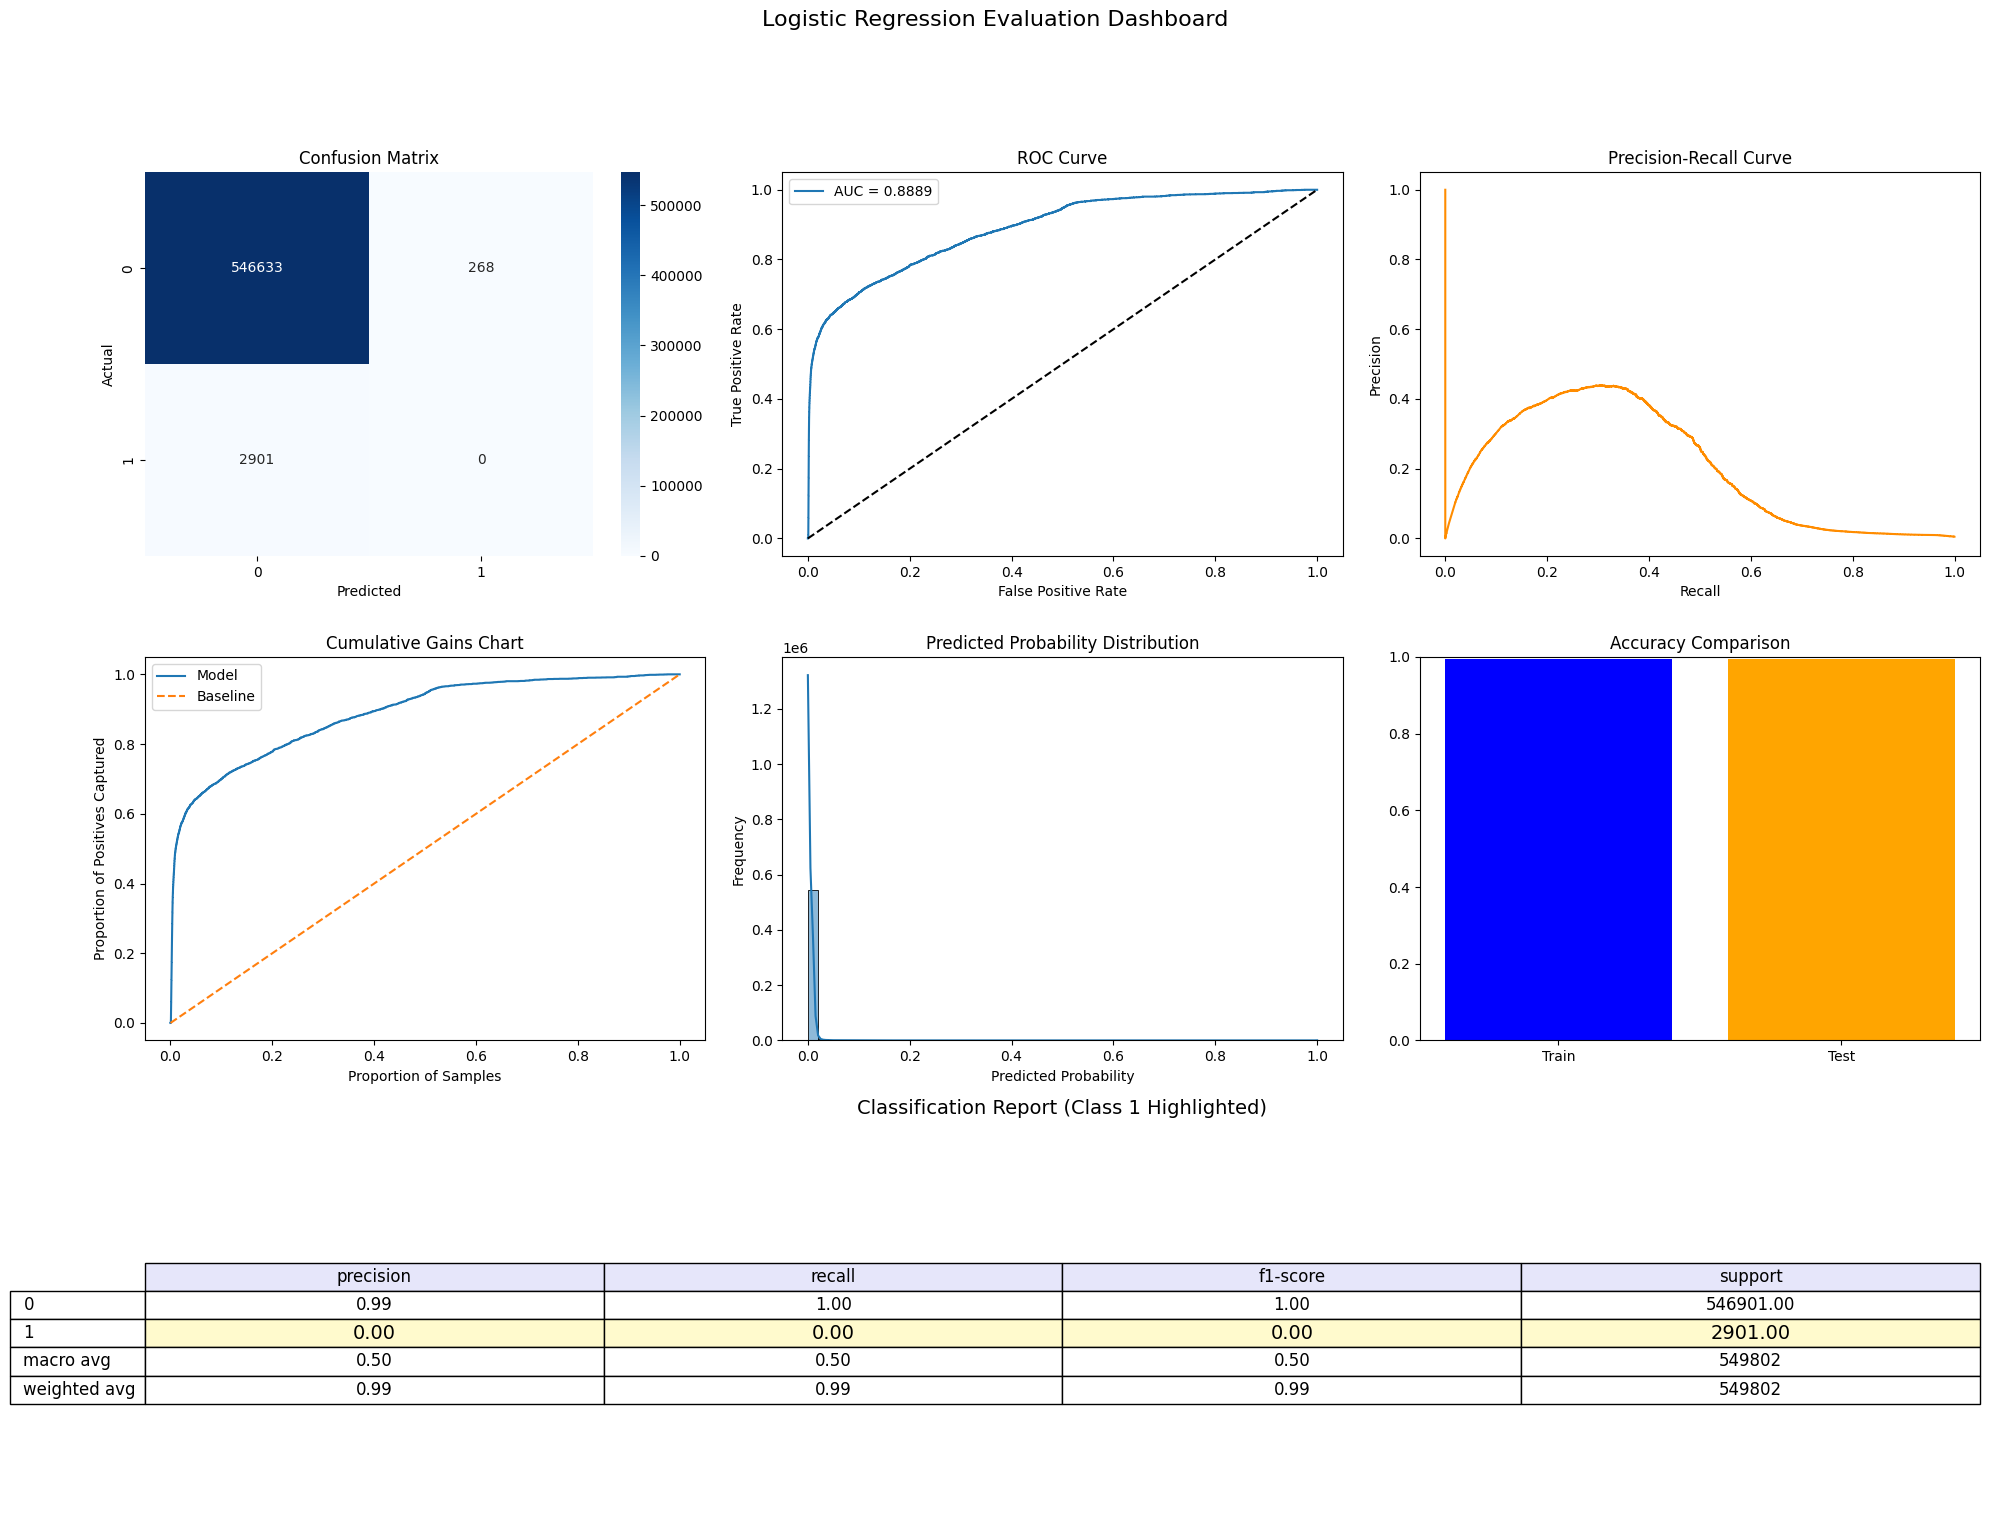


Logistic Regression Classification Report:

              precision    recall  f1-score   support

           0       0.99      1.00      1.00    546901
           1       0.00      0.00      0.00      2901

    accuracy                           0.99    549802
   macro avg       0.50      0.50      0.50    549802
weighted avg       0.99      0.99      0.99    549802

Logistic Regression ROC AUC Score: 0.8889
Logistic Regression Train Accuracy: 0.9943
Logistic Regression Test Accuracy:  0.9942
No significant overfitting/underfitting detected.


In [15]:
# Evaluate the logistic regression model using the comprehensive function
evaluate_model(lr_model, X_train, y_train, X_test, y_test, model_name="Logistic Regression")

### 5.1.2 XGBoost

In [16]:
set_seed(42)

# Initialize and train the XGBoost classifier
xgb_model = xgb.XGBClassifier(objective='binary:logistic',
                              eval_metric='logloss',
                              max_depth=6,
                              learning_rate=0.1,
                              random_state=42)

xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]  # Get probability scores for class 1
y_pred_xgb = (y_pred_proba > 0.5).astype(int)  # Convert to binary predictions

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_xgb)
conf_matrix = confusion_matrix(y_test, y_pred_xgb)
class_report = classification_report(y_test, y_pred_xgb)

# Print results
print("XGBoost:")
print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

XGBoost:
Accuracy: 0.9985
Confusion Matrix:
[[546773    128]
 [   673   2228]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    546901
           1       0.95      0.77      0.85      2901

    accuracy                           1.00    549802
   macro avg       0.97      0.88      0.92    549802
weighted avg       1.00      1.00      1.00    549802



In [17]:
xgb_model.get_params()

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': 'logloss',
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': 0.1,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': 6,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': 42,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

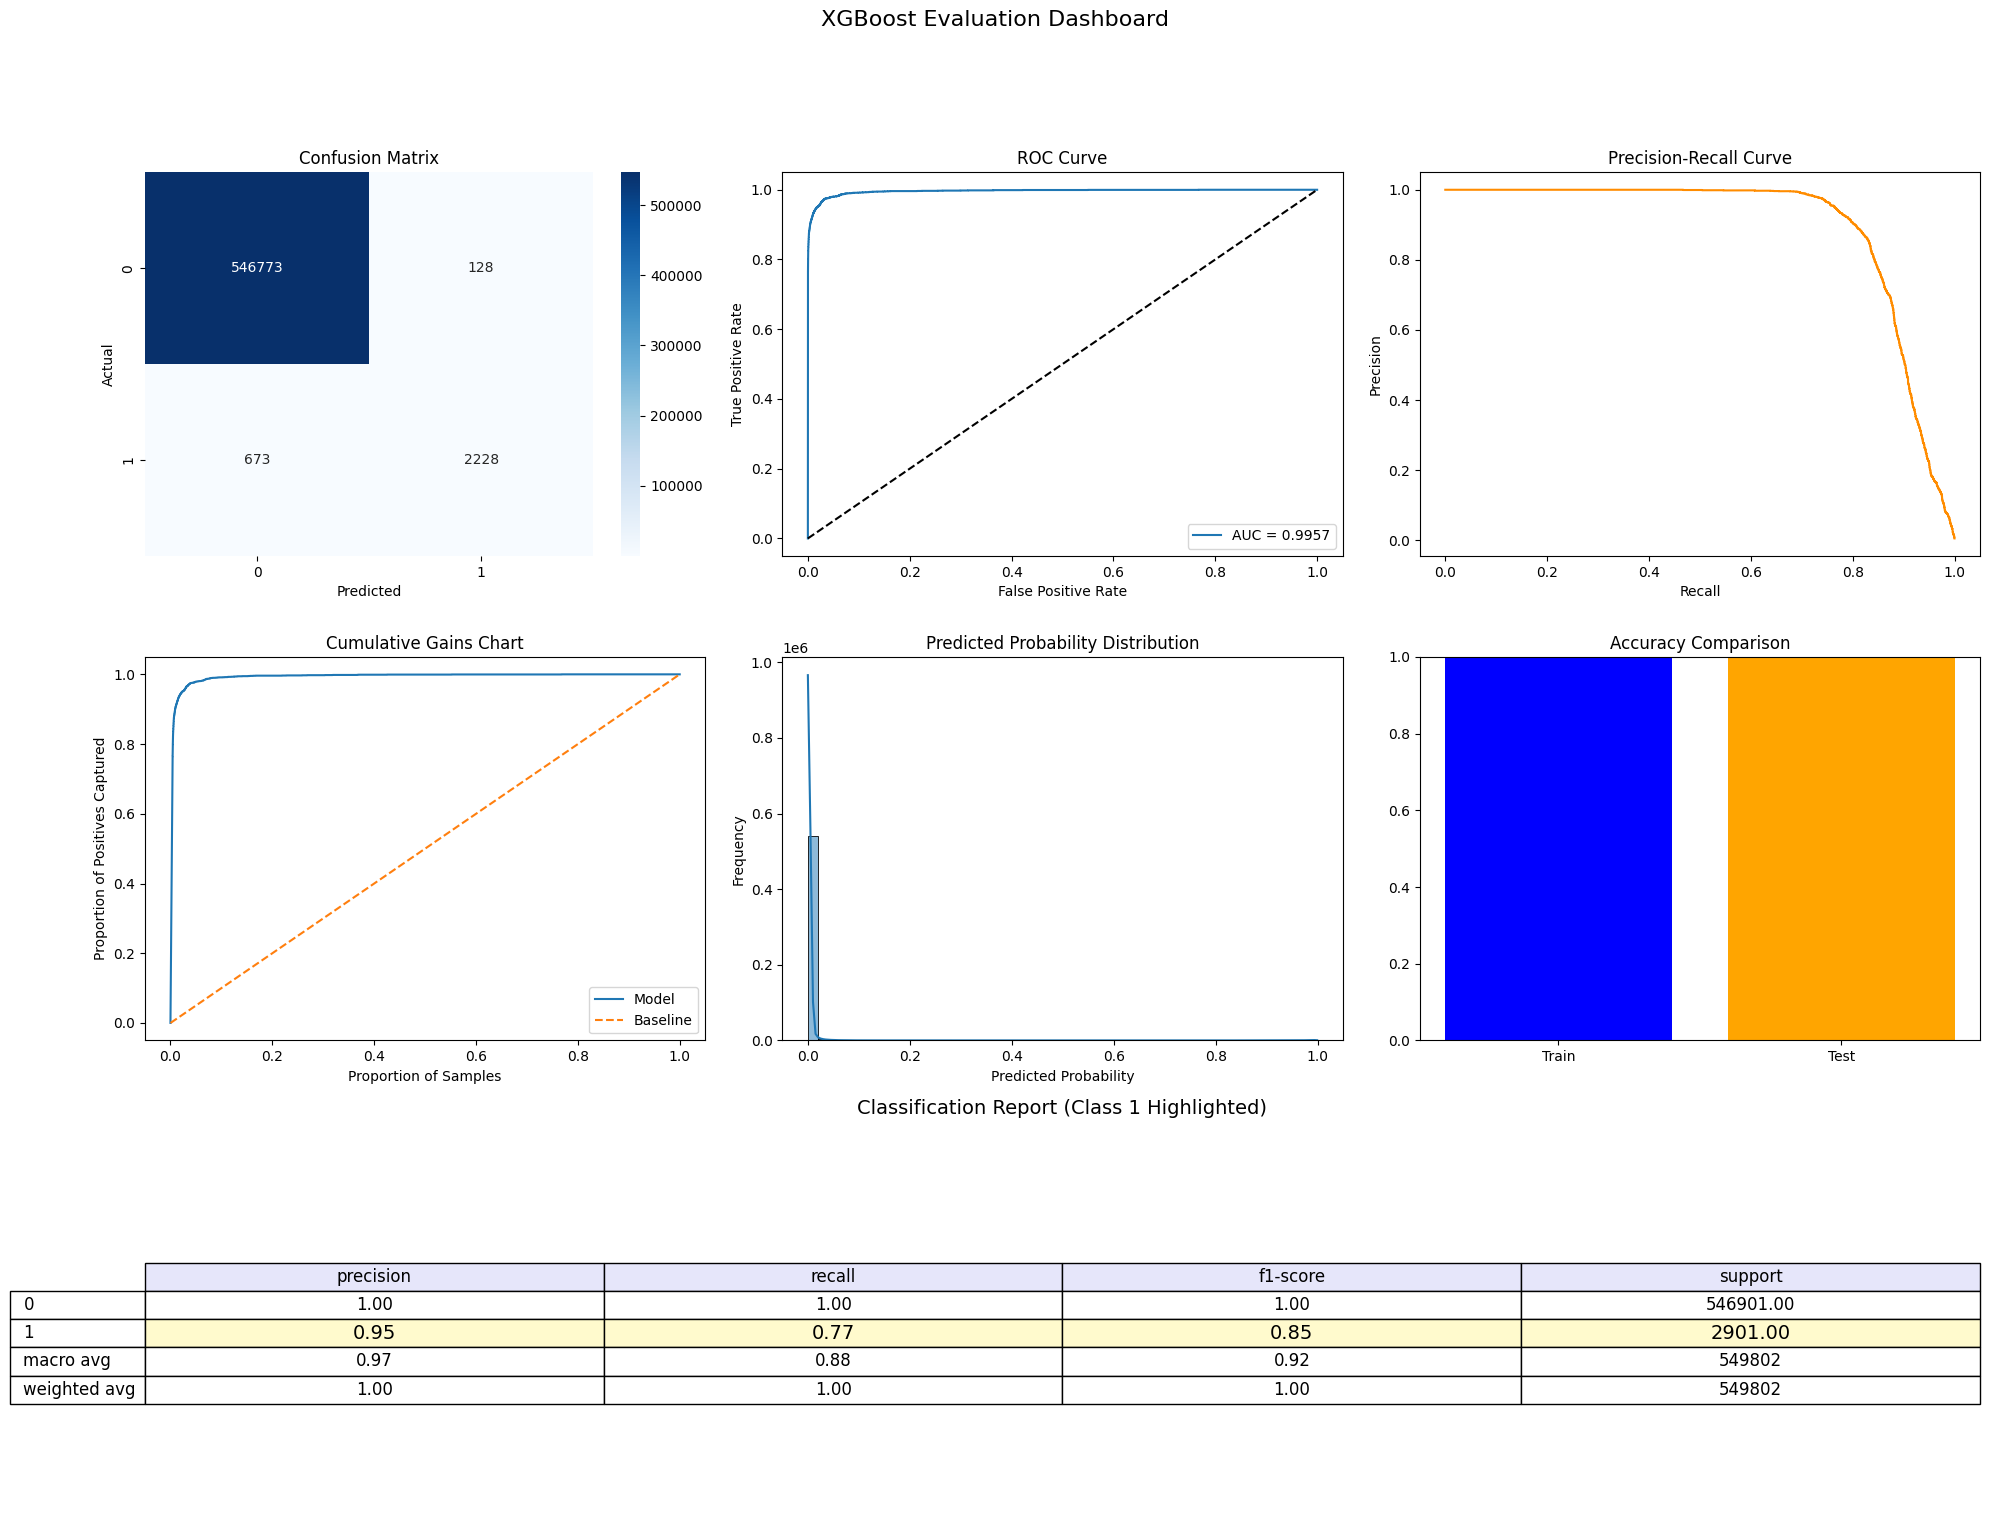


XGBoost Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    546901
           1       0.95      0.77      0.85      2901

    accuracy                           1.00    549802
   macro avg       0.97      0.88      0.92    549802
weighted avg       1.00      1.00      1.00    549802

XGBoost ROC AUC Score: 0.9957
XGBoost Train Accuracy: 0.9986
XGBoost Test Accuracy:  0.9985
No significant overfitting/underfitting detected.


In [18]:
# Evaluate the XGBoost model using the comprehensive function
evaluate_model(xgb_model, X_train, y_train, X_test, y_test, model_name="XGBoost")

## **5.2 Deep learning**

### Deep Prep

In [ ]:
# Feature Engineering (as provided)
X_original_features = df.drop(columns=['is_fraud', 'cc_num', 'trans_date_trans_time'], axis=1, errors='ignore')
y_target_for_encoding = df['is_fraud']

num_cols = ['amt', 'city_pop', 'age', 'trans_year']
high_card_cols = ['merchant', 'category', 'job_category','state','city']
low_card_cols = ['Region', 'day_period', 'age_group', 'trans_month', 'day_name']
ready_cols = ['gender', 'is_weekend']

existing_num_cols = [col for col in num_cols if col in X_original_features.columns]
existing_high_card_cols = [col for col in high_card_cols if col in X_original_features.columns]
existing_low_card_cols = [col for col in low_card_cols if col in X_original_features.columns]
existing_ready_cols = [col for col in ready_cols if col in X_original_features.columns]

if existing_high_card_cols:
    encoder = TargetEncoder(cols=existing_high_card_cols)
    X_high = encoder.fit_transform(X_original_features[existing_high_card_cols], y_target_for_encoding)
else: X_high = pd.DataFrame(index=X_original_features.index)
if existing_low_card_cols:
    X_low = pd.get_dummies(X_original_features[existing_low_card_cols], columns=existing_low_card_cols, drop_first=True)
else: X_low = pd.DataFrame(index=X_original_features.index)
if existing_num_cols:
    scaler_feat_eng = StandardScaler()
    X_num = pd.DataFrame(scaler_feat_eng.fit_transform(X_original_features[existing_num_cols]), columns=existing_num_cols, index=X_original_features.index)
else: X_num = pd.DataFrame(index=X_original_features.index)
if existing_ready_cols:
    X_ready = X_original_features[existing_ready_cols].copy()
else: X_ready = pd.DataFrame(index=X_original_features.index)

X_processed = pd.concat([X_num, X_high, X_low, X_ready], axis=1)

In [24]:
# --- Step 1: Create sequences ---
df_for_sequencing = X_processed.copy()
df_for_sequencing['cc_num'] = df['cc_num']
df_for_sequencing['trans_date_trans_time'] = df['trans_date_trans_time']
df_for_sequencing['is_fraud'] = df['is_fraud']

sequence_length = 5
df_for_sequencing = df_for_sequencing.sort_values(['cc_num', 'trans_date_trans_time'])
sequences = []
labels = []
feature_columns_for_sequence = X_processed.columns.tolist()

for _, group in df_for_sequencing.groupby('cc_num'):
    if len(group) <= sequence_length:
        continue
    X_customer_features = group[feature_columns_for_sequence].values
    y_customer_labels = group['is_fraud'].values
    for i in range(sequence_length, len(group)):
        sequences.append(X_customer_features[i-sequence_length:i])
        labels.append(y_customer_labels[i])

if not sequences:
    print("No sequences were generated. Cannot proceed.")
    exit()
else:
    X_final_sequences = np.array(sequences)
    y_final_labels = np.array(labels)
    print(f"Shape of X_final_sequences: {X_final_sequences.shape}")
    print(f"Shape of y_final_labels: {y_final_labels.shape}")

Shape of X_final_sequences: (1827712, 5, 37)
Shape of y_final_labels: (1827712,)


In [25]:
# --- Step 2: Prepare Data ---
if len(np.unique(y_final_labels)) > 1:
    X_train_seq, X_test_seq, y_train_seq_labels, y_test_seq_labels = train_test_split(
        X_final_sequences, y_final_labels, test_size=0.3, random_state=42, stratify=y_final_labels
    )
else:
    X_train_seq, X_test_seq, y_train_seq_labels, y_test_seq_labels = train_test_split(
        X_final_sequences, y_final_labels, test_size=0.3, random_state=42
    )

print(f"\nData Split:")
print(f"X_train_seq shape: {X_train_seq.shape}, y_train_seq_labels shape: {y_train_seq_labels.shape}")
print(f"X_test_seq shape: {X_test_seq.shape}, y_test_seq_labels shape: {y_test_seq_labels.shape}")

# Filter out normal sequences from the training set for training the autoencoder
X_train_seq_normal = X_train_seq[y_train_seq_labels == 0]
print(f"X_train_seq_normal (for AE training) shape: {X_train_seq_normal.shape}")

if X_train_seq_normal.shape[0] == 0:
    print("No normal sequences in the training set to train the autoencoder. Stopping.")
    exit()

set_seed(42)


Data Split:
X_train_seq shape: (1279398, 5, 37), y_train_seq_labels shape: (1279398,)
X_test_seq shape: (548314, 5, 37), y_test_seq_labels shape: (548314,)
X_train_seq_normal (for AE training) shape: (1273011, 5, 37)


### 5.2.1 DNN

In [19]:
set_seed(42)
# Step 1: Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 2: Build DNN model
model_dnn = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-06-20 23:06:00.586385: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [20]:
# Step 3: Compile the model
model_dnn.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Step 4: Fit the model with early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history_dnn = model_dnn.fit(X_train_scaled, y_train,
                    epochs=10,
                    batch_size=512,
                    validation_split=0.2,
                    callbacks=[early_stop],
                    verbose=1)

Epoch 1/10


2005/2005 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9902 - loss: 0.0362 - val_accuracy: 0.9963 - val_loss: 0.0159
Epoch 2/10
2005/2005 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9966 - loss: 0.0150 - val_accuracy: 0.9963 - val_loss: 0.0149
Epoch 3/10
2005/2005 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9969 - loss: 0.0134 - val_accuracy: 0.9968 - val_loss: 0.0133
Epoch 4/10
2005/2005 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9972 - loss: 0.0121 - val_accuracy: 0.9971 - val_loss: 0.0120
Epoch 5/10
2005/2005 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9974 - loss: 0.0109 - val_accuracy: 0.9971 - val_loss: 0.0116
Epoch 6/10
2005/2005 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9976 - loss: 0.0100 - val_accuracy: 0.9973 - val_loss: 0.0110
Epoch 7/10
2005/2005 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9977 - loss: 0.0095 - val_accuracy: 0.9974 - val_loss: 0.0108
Epoch 8/10
2005/2005 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9978 - loss: 0.0090 - val_accurac

In [21]:
# Step 5: Make predictions
y_pred_proba = model_dnn.predict(X_test_scaled).flatten()
y_pred = (y_pred_proba > 0.5).astype(int)

# Step 6: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"\nTest Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

  196/17182 ━━━━━━━━━━━━━━━━━━━━ 8s 514us/step

17182/17182 ━━━━━━━━━━━━━━━━━━━━ 9s 519us/step

Test Accuracy: 0.9975
Confusion Matrix:
[[546511    390]
 [  1009   1892]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    546901
           1       0.83      0.65      0.73      2901

    accuracy                           1.00    549802
   macro avg       0.91      0.83      0.86    549802
weighted avg       1.00      1.00      1.00    549802



  398/17182 ━━━━━━━━━━━━━━━━━━━━ 8s 507us/step

17182/17182 ━━━━━━━━━━━━━━━━━━━━ 9s 513us/step
40090/40090 ━━━━━━━━━━━━━━━━━━━━ 20s 511us/step


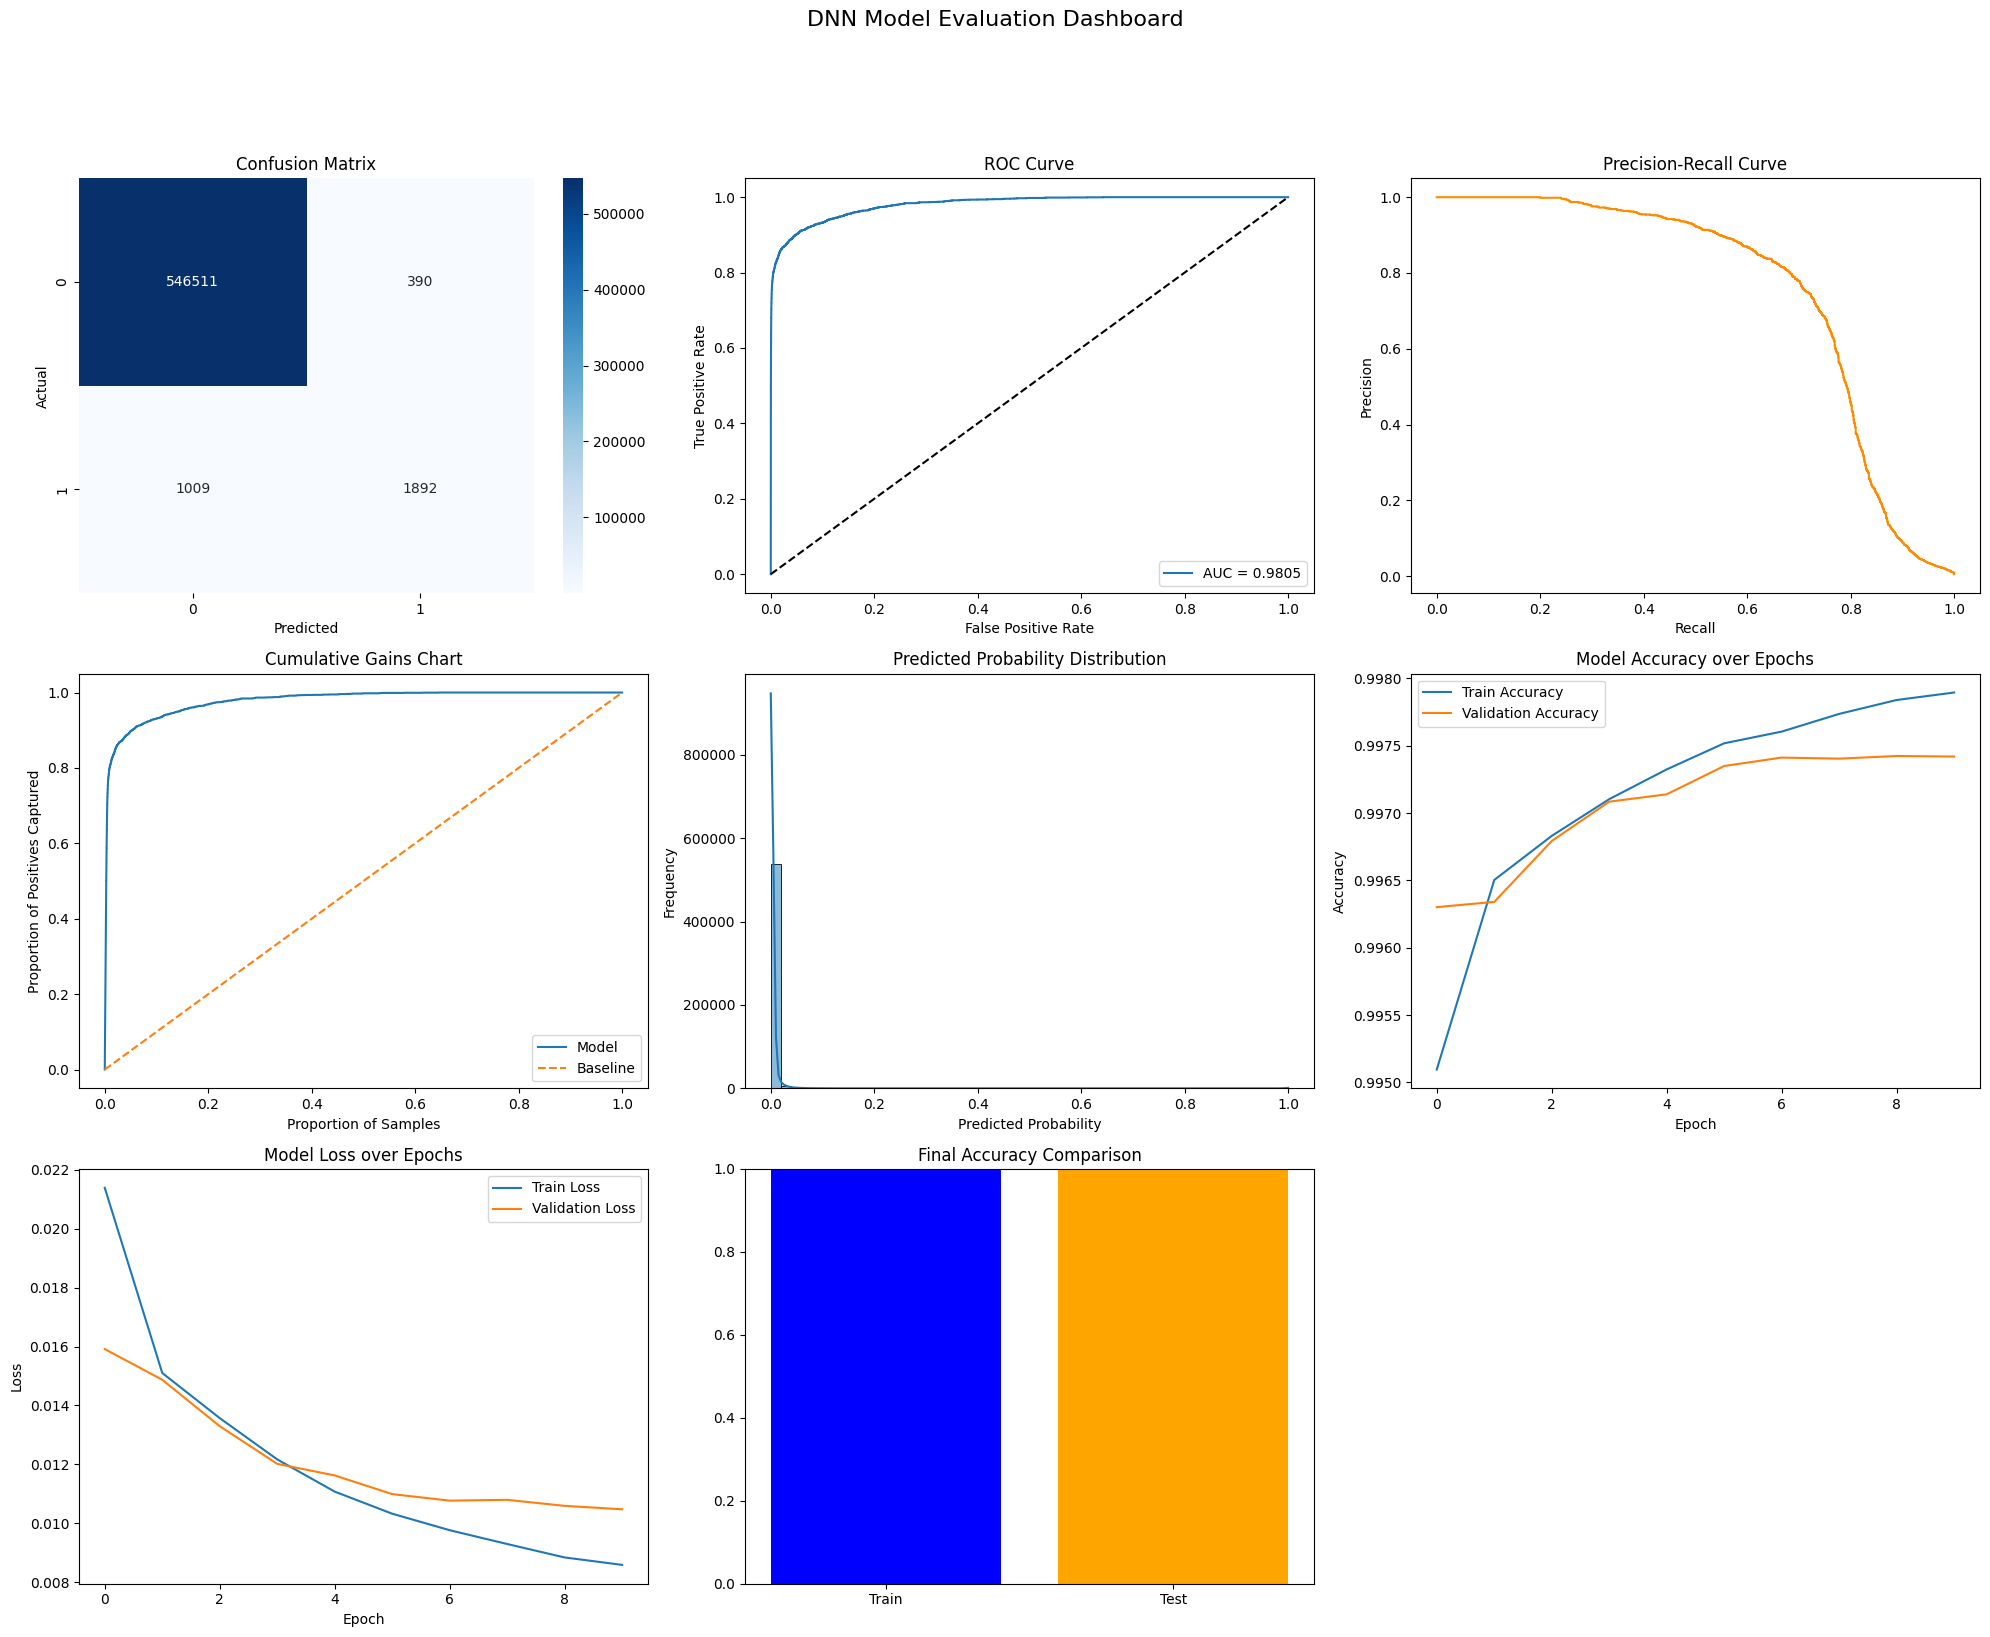


DNN Model Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    546901
           1       0.83      0.65      0.73      2901

    accuracy                           1.00    549802
   macro avg       0.91      0.83      0.86    549802
weighted avg       1.00      1.00      1.00    549802

DNN Model ROC AUC Score: 0.9805
Final Train Accuracy: 0.9981
Final Test Accuracy:  0.9975
No significant overfitting/underfitting detected.


In [22]:
evaluate_nn_model(model_dnn, X_train_scaled, y_train, X_test_scaled, y_test, history=history_dnn, model_name="DNN Model")

### 5.2.2 LSTM

In [26]:
X_final_sequences = np.array(sequences)
y_final_labels = np.array(labels)

X_final_sequences = X_final_sequences.astype('float32')
y_final_labels = y_final_labels.astype('int32')


print(f"Shape of X_final_sequences: {X_final_sequences.shape}")
print(f"Shape of y_final_labels: {y_final_labels.shape}")
print(f"\nCorrected Dtype of X_final_sequences: {X_final_sequences.dtype}")
print(f"Corrected Dtype of y_final_labels: {y_final_labels.dtype}")

Shape of X_final_sequences: (1827712, 5, 37)
Shape of y_final_labels: (1827712,)

Corrected Dtype of X_final_sequences: float32
Corrected Dtype of y_final_labels: int32


In [28]:
model_lstm = Sequential([
    LSTM(128, input_shape=(X_train_seq.shape[1], X_train_seq.shape[2]), return_sequences=True),
    LSTM(64, return_sequences=False),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')])

/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [29]:
# --- Step 2: Prepare Data (Now with corrected dtypes) ---
if len(np.unique(y_final_labels)) > 1:
    X_train_seq, X_test_seq, y_train_seq_labels, y_test_seq_labels = train_test_split(
        X_final_sequences, y_final_labels, test_size=0.3, random_state=42, stratify=y_final_labels
    )
else:
    model_lstm = Sequential([
    LSTM(128, input_shape=(X_train_seq.shape[1], X_train_seq.shape[2]), return_sequences=True),
    LSTM(64, return_sequences=False),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_lstm.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
# The fit call will now work correctly
history_lstm = model_lstm.fit(
    X_train_seq, y_train_seq_labels,
    validation_split=0.2,
    epochs=10,
    batch_size=512,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 33s 16ms/step - accuracy: 0.9928 - loss: 0.0403 - val_accuracy: 0.9972 - val_loss: 0.0131
Epoch 2/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 32s 16ms/step - accuracy: 0.9970 - loss: 0.0134 - val_accuracy: 0.9973 - val_loss: 0.0125
Epoch 3/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 32s 16ms/step - accuracy: 0.9972 - loss: 0.0124 - val_accuracy: 0.9975 - val_loss: 0.0115
Epoch 4/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 32s 16ms/step - accuracy: 0.9974 - loss: 0.0115 - val_accuracy: 0.9976 - val_loss: 0.0107
Epoch 5/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 32s 16ms/step - accuracy: 0.9977 - loss: 0.0105 - val_accuracy: 0.9977 - val_loss: 0.0102
Epoch 6/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 32s 16ms/step - accuracy: 0.9978 - loss: 0.0099 - val_accuracy: 0.9978 - val_loss: 0.0098
Epoch 7/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 32s 16ms/step - accuracy: 0.9979 - loss: 0.0093 - val_accuracy: 0.9978 - val_loss: 0.0096
Epoch 8/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 32s 16ms/step - accuracy: 0.9981 -

--- Evaluating LSTM ---


17135/17135 ━━━━━━━━━━━━━━━━━━━━ 28s 2ms/step
39982/39982 ━━━━━━━━━━━━━━━━━━━━ 65s 2ms/step

LSTM Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    545577
           1       0.84      0.69      0.76      2737

    accuracy                           1.00    548314
   macro avg       0.92      0.85      0.88    548314
weighted avg       1.00      1.00      1.00    548314



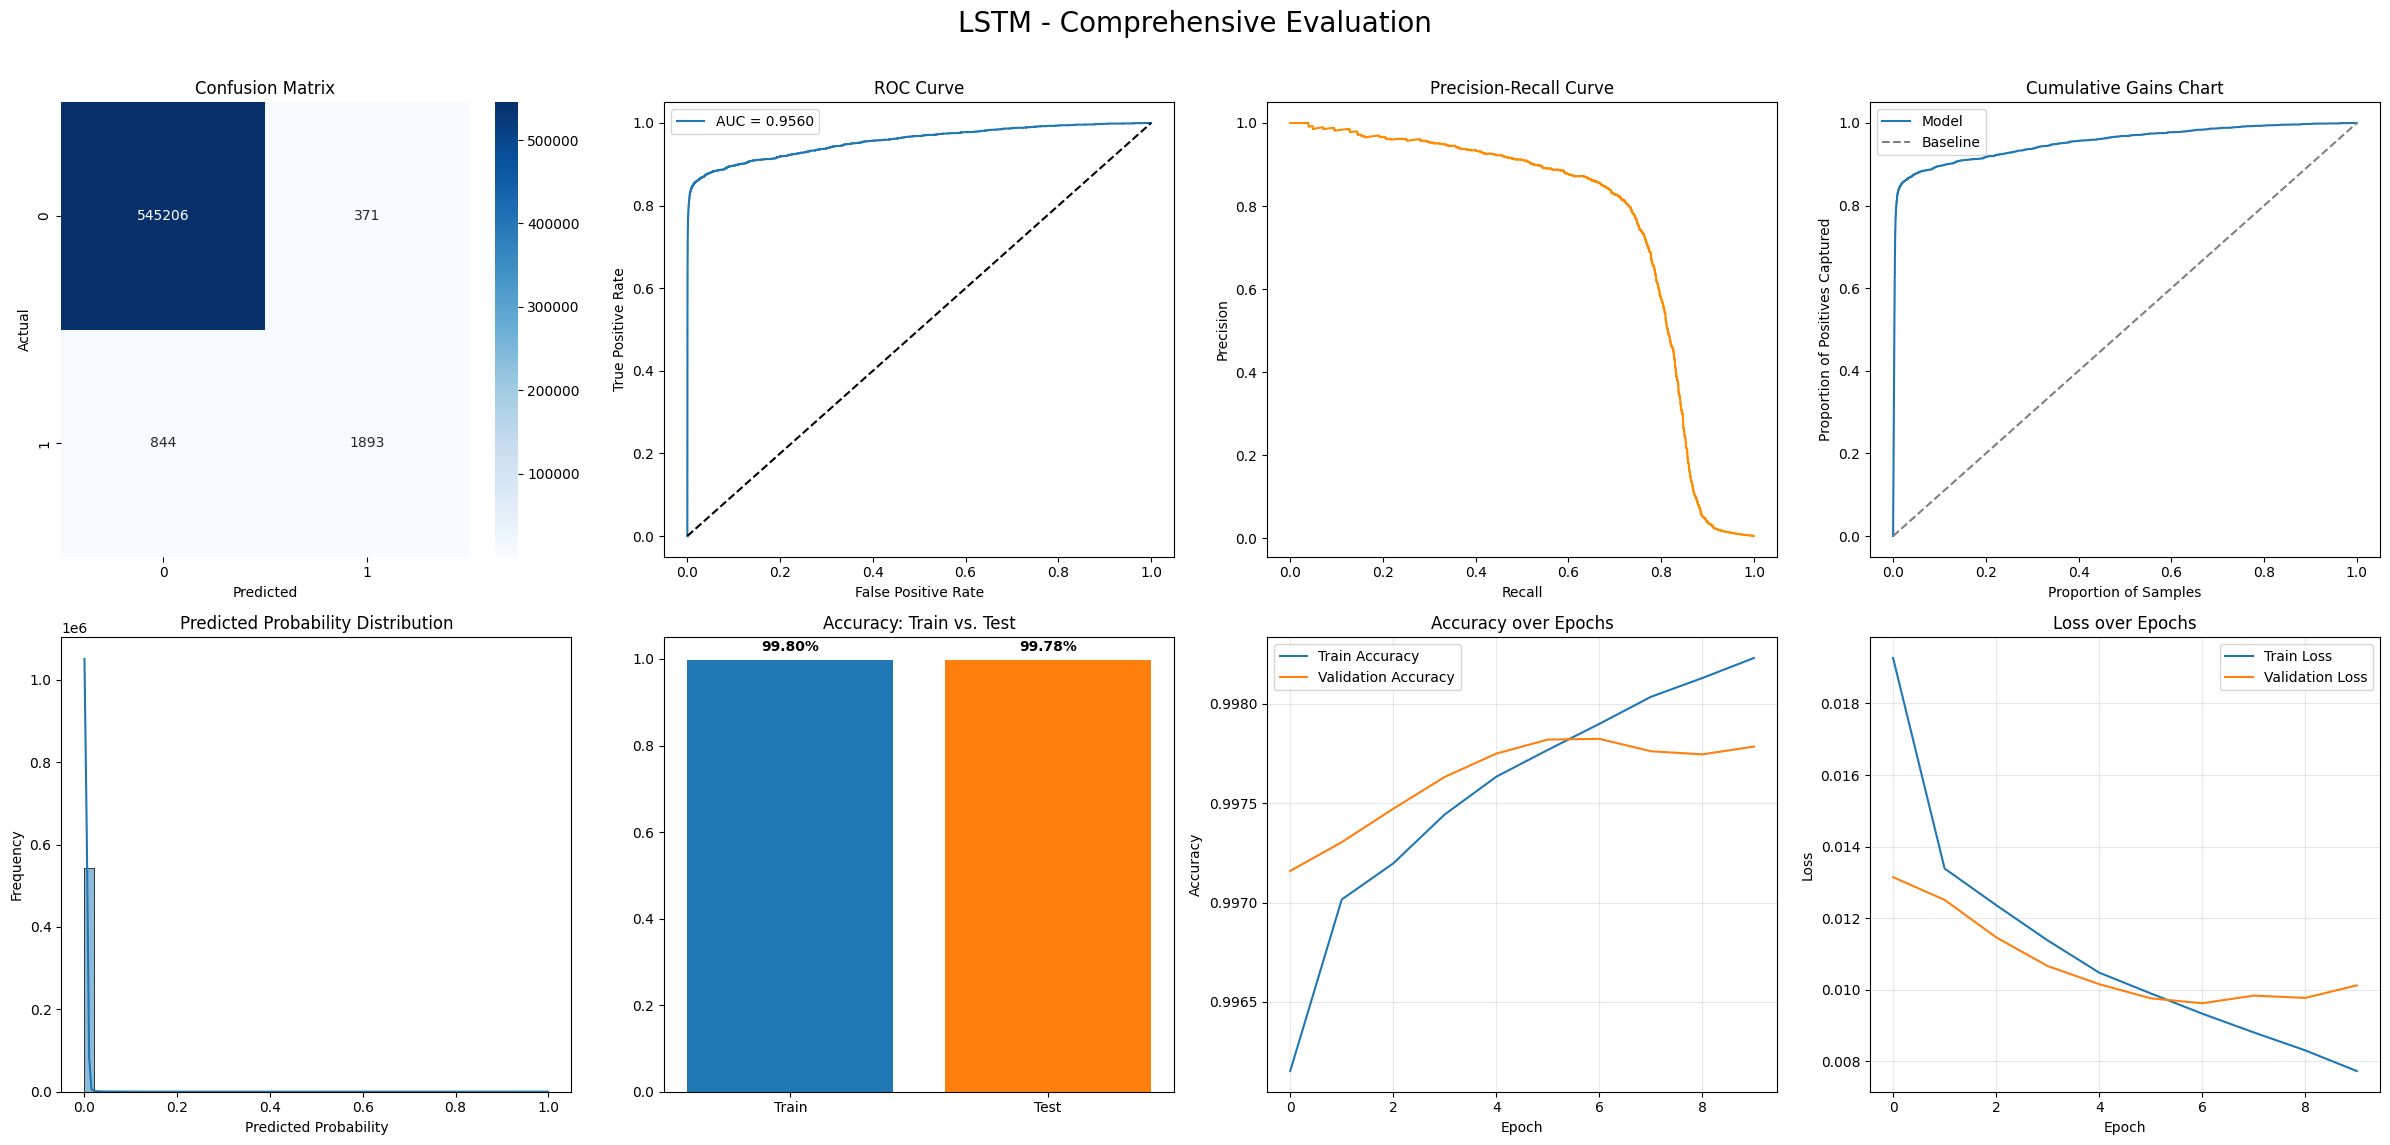


LSTM Final Metrics:
-> ROC AUC Score: 0.9560
-> Train Accuracy: 0.9980
-> Test Accuracy:  0.9978
-> Good Generalization: Training and test accuracies are close.


In [30]:
evaluate_sequences_model(
    model=model_lstm,
    X_train_seq=X_train_seq,
    y_train_labels=y_train_seq_labels,
    X_test_seq=X_test_seq,
    y_test_labels=y_test_seq_labels,
    history=history_lstm,
    model_name="LSTM"
)

In [31]:
model_lstm.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 5, 128)         │        84,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 409,541 (1.56 MB)

 Trainable params: 136,513 (533.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 273,028 (1.04 MB)

### 5.2.3 RNN

In [60]:
model_rnn = Sequential([
    # First RNN layer.
    # input_shape should be (n_timesteps, n_features_per_timestep)
    # return_sequences=True is needed to pass the output of each timestep to the next RNN layer.
    SimpleRNN(128, input_shape=(X_train_seq.shape[1], X_train_seq.shape[2]), return_sequences=True),

    # Second RNN layer.
    # return_sequences=False (default) because we only need the final output of the sequence
    # to pass to the next Dense layer.
    SimpleRNN(64, return_sequences=False),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid') # Sigmoid activation for binary (0 or 1) classification
])

# Compile the model
model_rnn.compile(optimizer=Adam(learning_rate=0.001),
                  loss='binary_crossentropy', # Appropriate loss function for binary classification
                  metrics=['accuracy'])

# Prepare the EarlyStopping callback to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history_rnn = model_rnn.fit(X_train_seq, y_train,
                            validation_split=0.2,
                            epochs=10,
                            batch_size=512,
                            callbacks=[early_stop],
                            verbose=1)

model_rnn.summary()

/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10


2000/2000 ━━━━━━━━━━━━━━━━━━━━ 29s 13ms/step - accuracy: 0.9907 - loss: 0.0428 - val_accuracy: 0.9948 - val_loss: 0.0327
Epoch 2/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 26s 13ms/step - accuracy: 0.9949 - loss: 0.0326 - val_accuracy: 0.9948 - val_loss: 0.0327
Epoch 3/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 28s 14ms/step - accuracy: 0.9949 - loss: 0.0326 - val_accuracy: 0.9948 - val_loss: 0.0327
Epoch 4/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 26s 13ms/step - accuracy: 0.9949 - loss: 0.0326 - val_accuracy: 0.9948 - val_loss: 0.0326
Epoch 5/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.9949 - loss: 0.0326 - val_accuracy: 0.9948 - val_loss: 0.0326
Epoch 6/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 26s 13ms/step - accuracy: 0.9949 - loss: 0.0325 - val_accuracy: 0.9948 - val_loss: 0.0327
Epoch 7/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 26s 13ms/step - accuracy: 0.9949 - loss: 0.0325 - val_accuracy: 0.9948 - val_loss: 0.0326
Epoch 8/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.9949 - loss: 0.03

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_2 (SimpleRNN)        │ (None, 5, 128)         │        21,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_3 (SimpleRNN)        │ (None, 64)             │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 107,141 (418.52 KB)

 Trainable params: 35,713 (139.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 71,428 (279.02 KB)

--- Evaluating RNN ---
17135/17135 ━━━━━━━━━━━━━━━━━━━━ 28s 2ms/step
39982/39982 ━━━━━━━━━━━━━━━━━━━━ 59s 1ms/step

RNN Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    545577
           1       0.00      0.00      0.00      2737

    accuracy                           1.00    548314
   macro avg       0.50      0.50      0.50    548314
weighted avg       0.99      1.00      0.99    548314



/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"

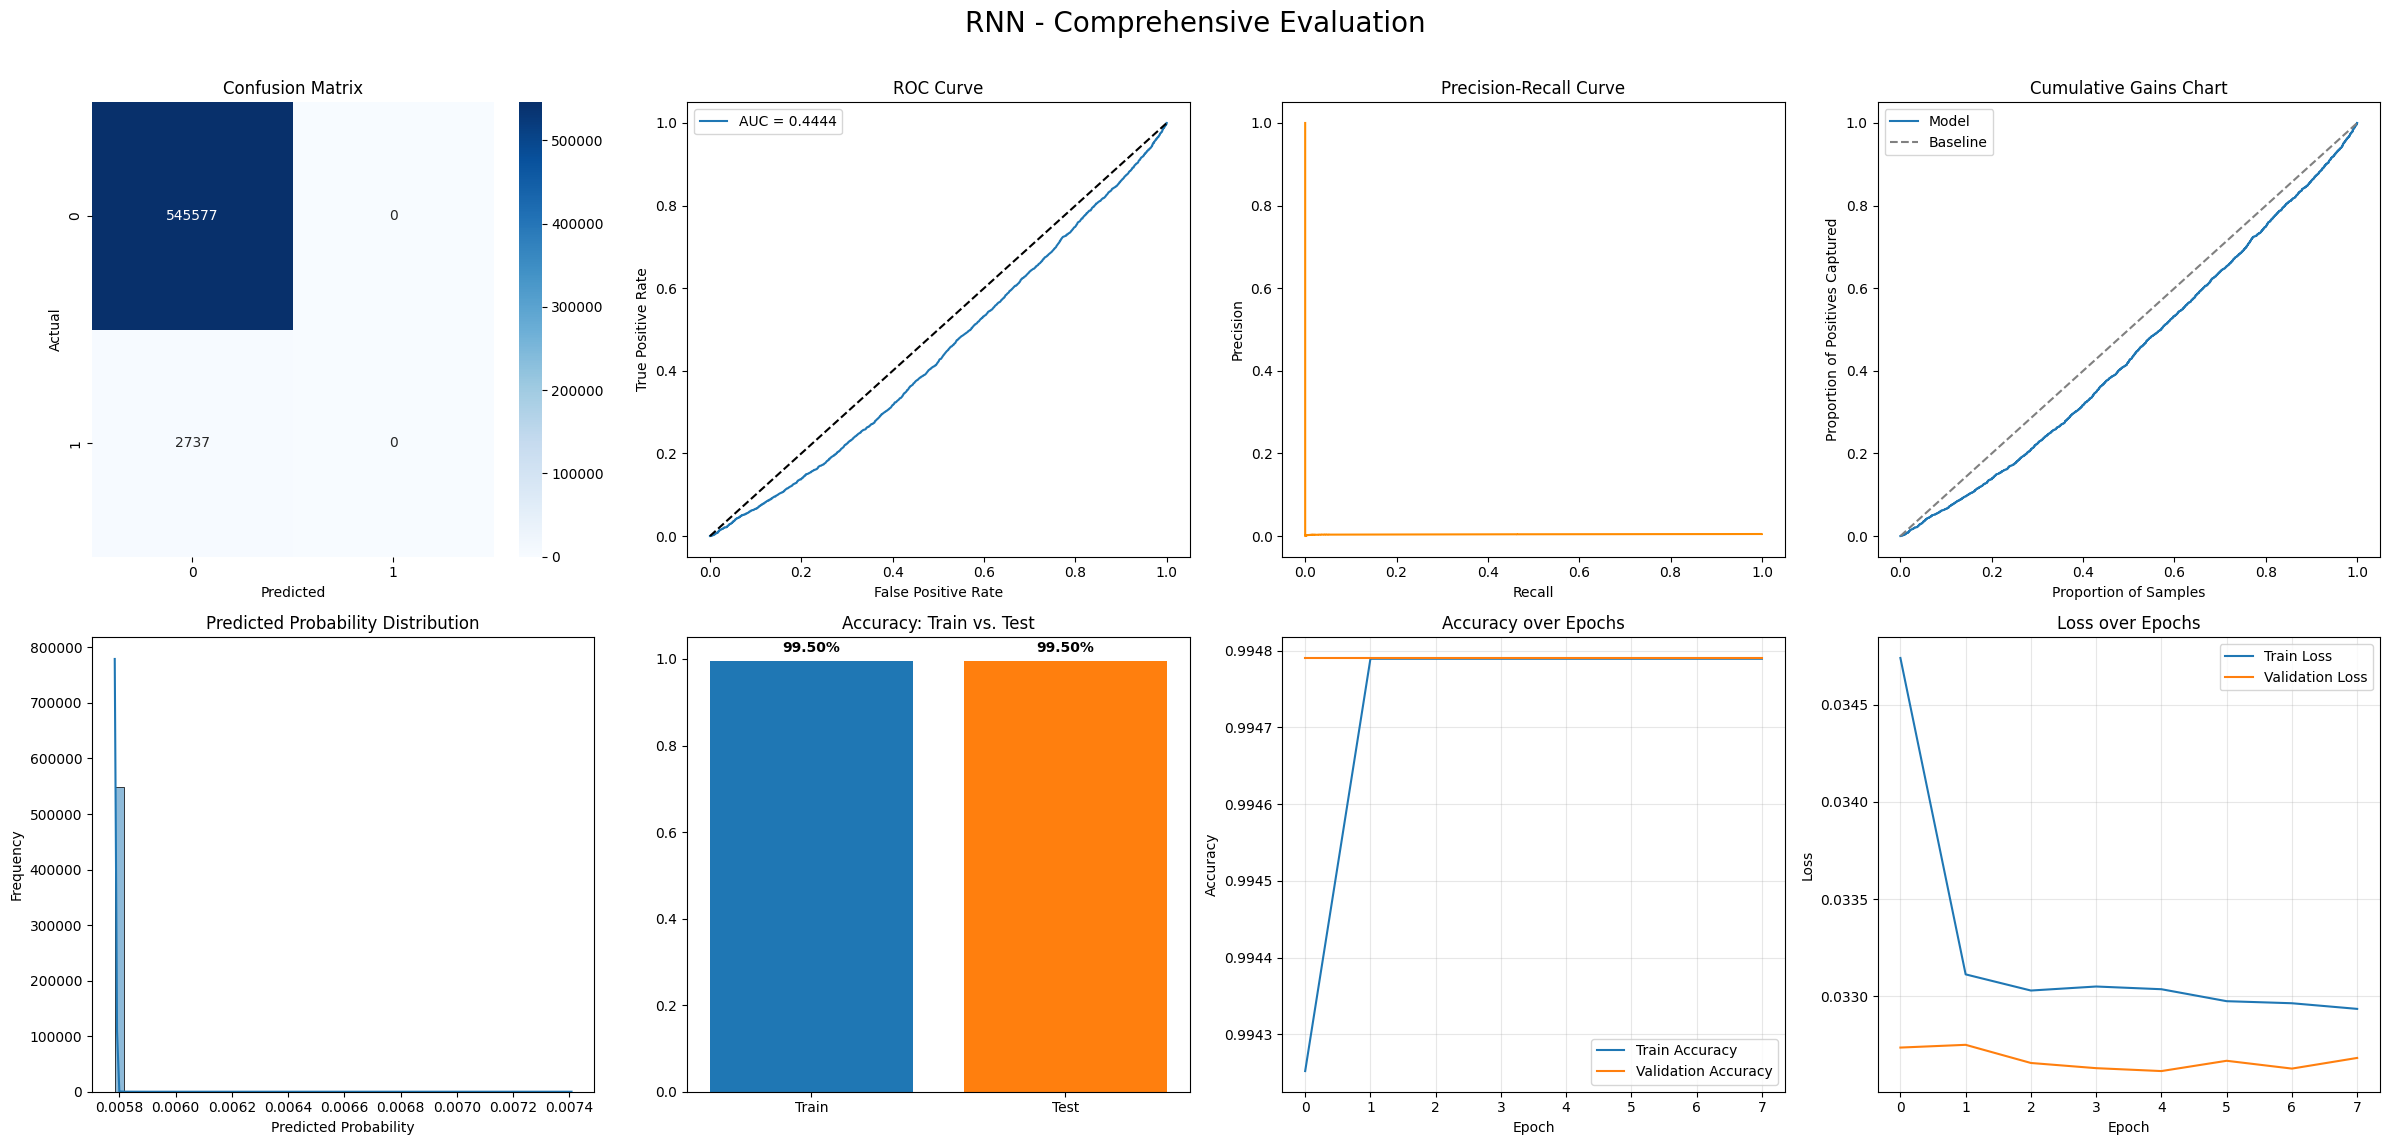


RNN Final Metrics:
-> ROC AUC Score: 0.4444
-> Train Accuracy: 0.9950
-> Test Accuracy:  0.9950
-> Good Generalization: Training and test accuracies are close.


In [61]:
evaluate_sequences_model(
    model=model_rnn,
    X_train_seq=X_train_seq,
    y_train_labels=y_train_seq_labels,
    X_test_seq=X_test_seq,
    y_test_labels=y_test_seq_labels,
    history=history_rnn,
    model_name="RNN"
)

### **5.2.4 AutoEncoder**

In [32]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LeakyReLU
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, precision_recall_curve
import matplotlib.pyplot as plt

In [33]:
X_train_seq_normal = X_train_seq[y_train_seq_labels == 0]

print(f"Original shape of normal training sequences: {X_train_seq_normal.shape}")
print(f"Original shape of test sequences: {X_test_seq.shape}")

# --- Step 2: Flatten the Sequence Data ---
# This is the key step to make the data compatible with Dense layers.
# We reshape from (samples, timesteps, features) to (samples, timesteps * features).
n_samples, n_timesteps, n_features = X_train_seq_normal.shape
X_train_normal_flat = X_train_seq_normal.reshape((n_samples, n_timesteps * n_features))

n_samples_test, _, _ = X_test_seq.shape
X_test_flat = X_test_seq.reshape((n_samples_test, n_timesteps * n_features))

input_dim = X_train_normal_flat.shape[1] # The new input dimension is timesteps * features

Original shape of normal training sequences: (1273011, 5, 37)
Original shape of test sequences: (548314, 5, 37)


In [35]:
# --- Step 3: Define the Dense Autoencoder (Your Original Architecture) ---
encoding_dim = 128  # This can be tuned

autoencoder_dense = Sequential([
    Dense(encoding_dim * 2, input_shape=(input_dim,)),
    LeakyReLU(alpha=0.1),
    Dropout(0.1),
    Dense(encoding_dim),
    LeakyReLU(alpha=0.1),
    Dense(encoding_dim * 2),
    LeakyReLU(alpha=0.1),
    Dense(input_dim, activation='linear') # Reconstruct the flattened vector
])

# Compile the Autoencoder
# We monitor 'mse' (mean squared error) as the loss. 'accuracy' is not applicable here.
autoencoder_dense.compile(optimizer='adam', loss='mse')
autoencoder_dense.summary()

# --- Step 4: Train the Autoencoder on Flattened Normal Data ---
early_stopping_ae = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history_ae_dense = autoencoder_dense.fit(
    X_train_normal_flat, X_train_normal_flat, # Train on flattened normal data
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping_ae],
    verbose=1 # verbose=1 will print the loss for each epoch during training
)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                │ (None, 256)            │        47,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_5 (LeakyReLU)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 185)            │        47,545 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 161,081 (629.22 KB)

 Trainable params: 161,081 (629.22 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
31826/31826 ━━━━━━━━━━━━━━━━━━━━ 49s 2ms/step - loss: 0.0148 - val_loss: 0.0150
Epoch 2/50
31826/31826 ━━━━━━━━━━━━━━━━━━━━ 48s 2ms/step - loss: 0.0037 - val_loss: 0.0079
Epoch 3/50
31826/31826 ━━━━━━━━━━━━━━━━━━━━ 48s 2ms/step - loss: 0.0025 - val_loss: 0.0050
Epoch 4/50
31826/31826 ━━━━━━━━━━━━━━━━━━━━ 49s 2ms/step - loss: 0.0020 - val_loss: 0.0056
Epoch 5/50
31826/31826 ━━━━━━━━━━━━━━━━━━━━ 48s 2ms/step - loss: 0.0018 - val_loss: 0.0033
Epoch 6/50
31826/31826 ━━━━━━━━━━━━━━━━━━━━ 48s 2ms/step - loss: 0.0016 - val_loss: 0.0032
Epoch 7/50
31826/31826 ━━━━━━━━━━━━━━━━━━━━ 49s 2ms/step - loss: 0.0016 - val_loss: 0.0043
Epoch 8/50
31826/31826 ━━━━━━━━━━━━━━━━━━━━ 48s 2ms/step - loss: 0.0016 - val_loss: 0.0038
Epoch 9/50
31826/31826 ━━━━━━━━━━━━━━━━━━━━ 49s 2ms/step - loss: 0.0015 - val_loss: 0.0037


In [36]:
# --- Step 6: Calculate Reconstruction Errors ---
# Define MSE loss with no reduction (element-wise)
mse_fn = tf.keras.losses.MeanSquaredError(reduction=tf.keras.losses.Reduction.NONE)

# CORRECTED FUNCTION
def get_reconstruction_errors(true_data, pred_data):
    """
    Calculates reconstruction errors.
    mse_fn with reduction=NONE already returns the per-sample error.
    """
    errors = mse_fn(true_data, pred_data).numpy()
    # No need for .mean(axis=1) as 'errors' is already a 1D array of per-sample errors
    return errors


In [37]:
# Calculate reconstruction errors on the flattened test set
reconstructions = autoencoder_dense.predict(X_test_flat)
reconstruction_errors = get_reconstruction_errors(X_test_flat, reconstructions)

  177/17135 ━━━━━━━━━━━━━━━━━━━━ 9s 573us/step

17135/17135 ━━━━━━━━━━━━━━━━━━━━ 10s 601us/step


In [38]:
# --- Step 7: Find an Optimal Threshold and Evaluate ---
# Use Precision-Recall curve to find a good threshold
prec, rec, thresholds = precision_recall_curve(y_test_seq_labels, reconstruction_errors)

# Find the threshold that gives the best F1-score
f1_scores = 2 * (prec * rec) / (prec + rec + 1e-9) # Add epsilon for stability
best_threshold = thresholds[np.argmax(f1_scores)]

print(f"\nDense Autoencoder Best Threshold (max F1-score): {best_threshold:.4f}")

# Predict anomalies: 1 if error > threshold, else 0
y_pred_ae_dense = (reconstruction_errors > best_threshold).astype(int)

# Evaluate performance
print("\nDense Autoencoder on Flattened Sequences - Evaluation:")
print("Confusion Matrix:")
print(confusion_matrix(y_test_seq_labels, y_pred_ae_dense))
print("\nClassification Report:")
print(classification_report(y_test_seq_labels, y_pred_ae_dense))
print(f"\nROC AUC Score: {roc_auc_score(y_test_seq_labels, reconstruction_errors):.4f}")


Dense Autoencoder Best Threshold (max F1-score): 0.0187

Dense Autoencoder on Flattened Sequences - Evaluation:
Confusion Matrix:
[[541827   3750]
 [  1726   1011]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    545577
           1       0.21      0.37      0.27      2737

    accuracy                           0.99    548314
   macro avg       0.60      0.68      0.63    548314
weighted avg       0.99      0.99      0.99    548314


ROC AUC Score: 0.8655


--- Evaluating AutoEncoder ---
    1/17135 ━━━━━━━━━━━━━━━━━━━━ 5:40 20ms/step

17135/17135 ━━━━━━━━━━━━━━━━━━━━ 10s 577us/step

AutoEncoder Classification Report (Threshold: 0.0187):

              precision    recall  f1-score   support

           0       1.00      0.99      0.99    545577
           1       0.21      0.37      0.27      2737

    accuracy                           0.99    548314
   macro avg       0.60      0.68      0.63    548314
weighted avg       0.99      0.99      0.99    548314



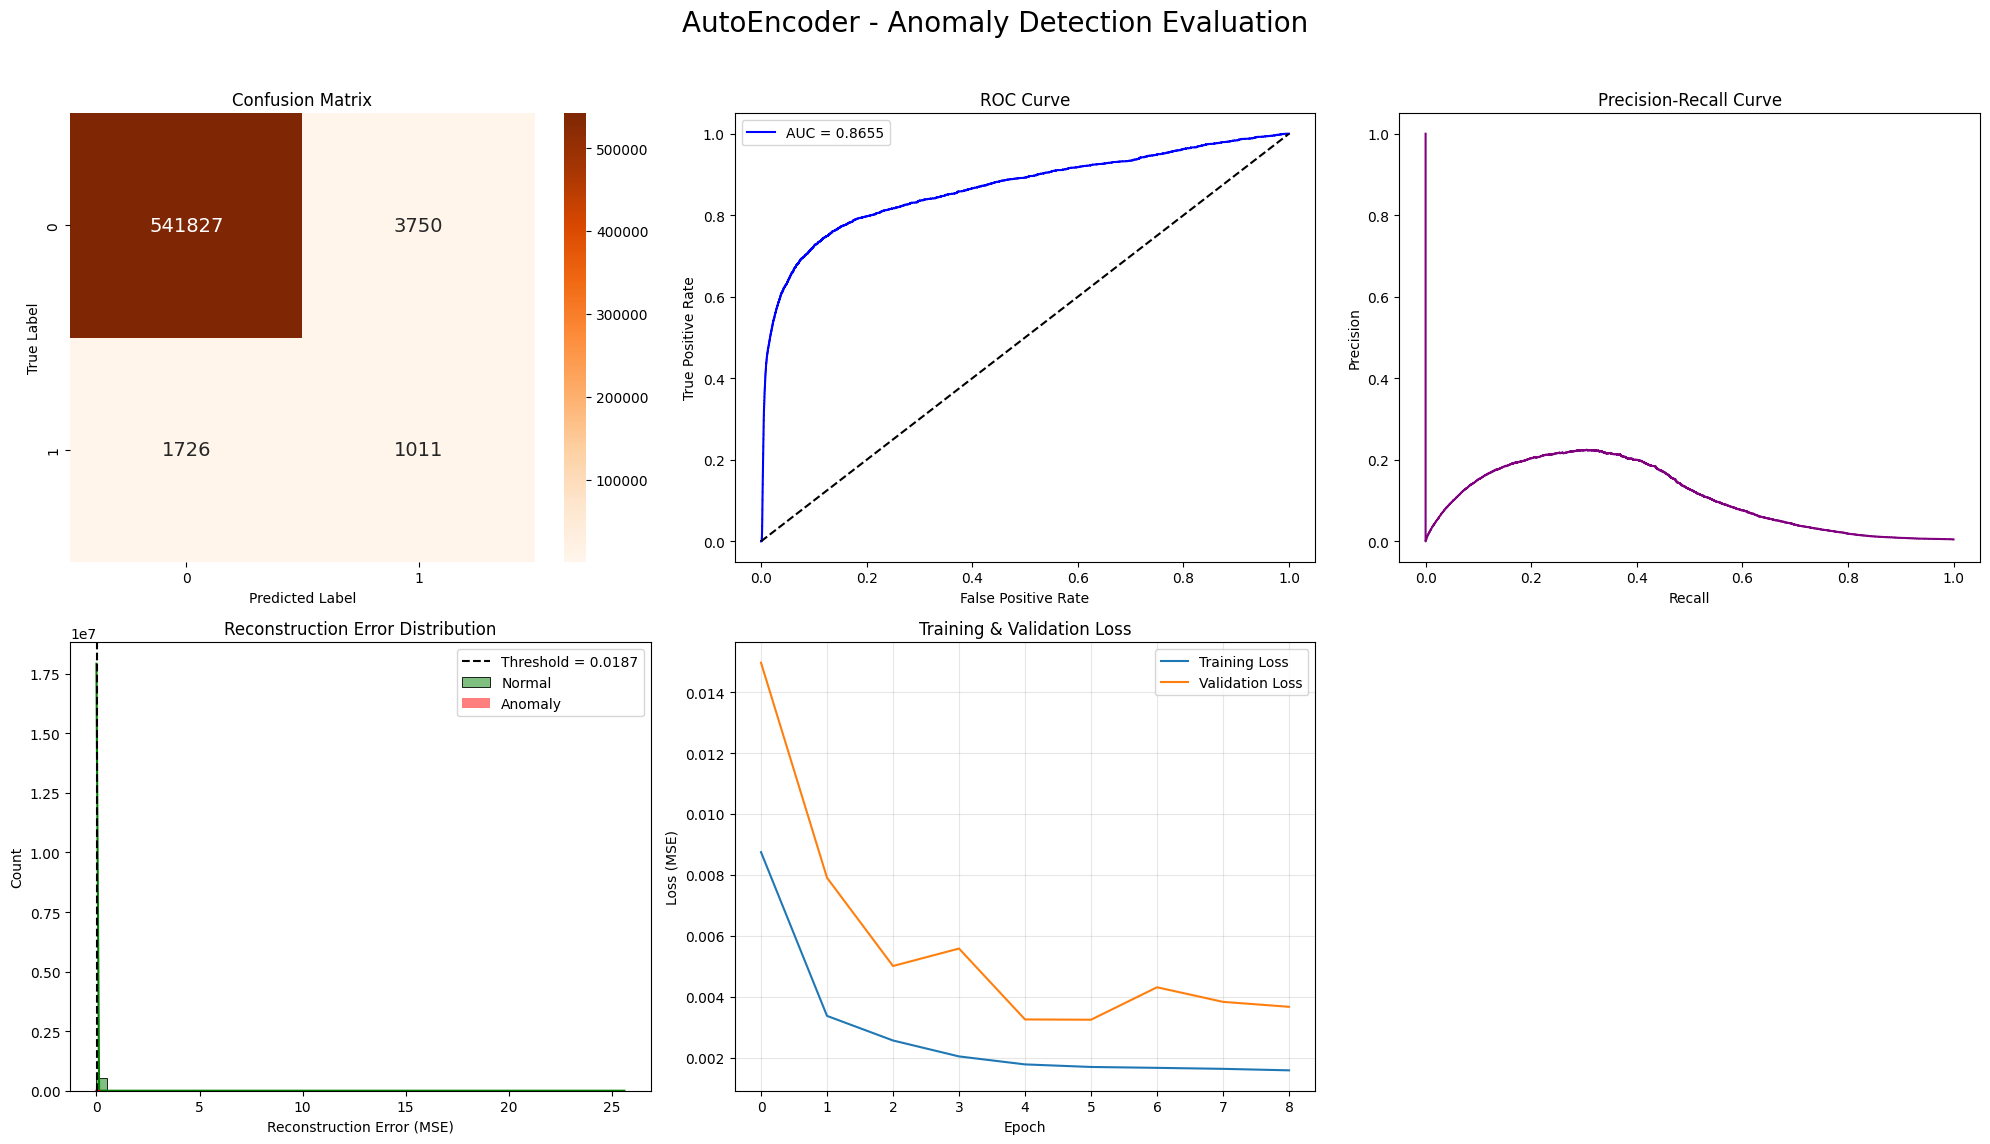


AutoEncoder Final Metrics:
-> ROC AUC Score: 0.8655


In [39]:
evaluate_autoencoder_model(
    model=autoencoder_dense,
    X_test_flat=X_test_flat,
    y_test_labels=y_test_seq_labels,
    threshold=best_threshold,
    history=history_ae_dense,
    model_name="AutoEncoder"
)

### **AE + LR**

In [40]:
# --- This code assumes the previous autoencoder script has been run ---
# 'autoencoder_dense' is the trained model.
# 'X_train_seq' and 'X_test_seq' are the original 3D sequence data.

print("--- Step 1: Calculating Reconstruction Errors for Train and Test Sets ---")

# Flatten the ENTIRE training sequence data (not just the normal part)
n_samples_train, n_timesteps_train, n_features_train = X_train_seq.shape
X_train_flat = X_train_seq.reshape((n_samples_train, n_timesteps_train * n_features_train))

# Predict reconstructions for the training set
train_reconstructions = autoencoder_dense.predict(X_train_flat)

# Calculate reconstruction errors for the training set
train_reconstruction_errors = get_reconstruction_errors(X_train_flat, train_reconstructions)

# The test set errors are already calculated from your previous code
test_reconstruction_errors = reconstruction_errors 

print(f"Shape of training errors: {train_reconstruction_errors.shape}")
print(f"Shape of testing errors: {test_reconstruction_errors.shape}")

--- Step 1: Calculating Reconstruction Errors for Train and Test Sets ---
39982/39982 ━━━━━━━━━━━━━━━━━━━━ 23s 577us/step
Shape of training errors: (1279398,)
Shape of testing errors: (548314,)


In [41]:
# Reshape errors to be a 2D array with one column
train_errors_reshaped = train_reconstruction_errors.reshape(-1, 1)
test_errors_reshaped = test_reconstruction_errors.reshape(-1, 1)

print(f"\nReshaped training errors for scikit-learn: {train_errors_reshaped.shape}")
print(f"Reshaped testing errors for scikit-learn: {test_errors_reshaped.shape}")


Reshaped training errors for scikit-learn: (1279398, 1)
Reshaped testing errors for scikit-learn: (548314, 1)


In [42]:
from sklearn.preprocessing import StandardScaler

# 1. Create the enhanced feature sets by adding the error as a new column
# We use np.c_ for concise column-wise concatenation
X_train_enhanced = np.c_[X_train_flat, train_reconstruction_errors]
X_test_enhanced = np.c_[X_test_flat, test_reconstruction_errors]

print(f"Shape of enhanced training set: {X_train_enhanced.shape}")
print(f"Shape of enhanced test set: {X_test_enhanced.shape}")

# 2. Scale the new combined dataset
# It's important to scale AFTER adding the new feature
scaler_enhanced = StandardScaler()
X_train_enhanced_scaled = scaler_enhanced.fit_transform(X_train_enhanced)
X_test_enhanced_scaled = scaler_enhanced.transform(X_test_enhanced)

# 3. Initialize and train the new Logistic Regression model
lr_model_enhanced = LogisticRegression(random_state=42, max_iter=1000)
lr_model_enhanced.fit(X_train_enhanced_scaled, y_train_seq_labels)

# 4. Make predictions and evaluate
y_pred_lr_enhanced = lr_model_enhanced.predict(X_test_enhanced_scaled)

print("\nClassification Report (Enhanced Feature Set):")
print(classification_report(y_test_seq_labels, y_pred_lr_enhanced))

Shape of enhanced training set: (1279398, 186)
Shape of enhanced test set: (548314, 186)

Classification Report (Enhanced Feature Set):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    545577
           1       0.77      0.40      0.52      2737

    accuracy                           1.00    548314
   macro avg       0.88      0.70      0.76    548314
weighted avg       1.00      1.00      1.00    548314



# **6. Comparing results**

In [43]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from IPython.display import display

# --- Step 1: Define the Metric Calculation Function ---
# We will use the robust helper function from before.
def get_model_metrics(model_name, y_true, y_pred, y_score):
    """
    Generates a dictionary of classification metrics for a given model's performance.
    """
    report = classification_report(y_true, y_pred, output_dict=True, zero_division=0)
    roc_auc = roc_auc_score(y_true, y_score)
    
    metrics_dict = {
        "Model Name": model_name,
        "Precision_0": report['0']['precision'],
        "Recall_0": report['0']['recall'],
        "F1-score_0": report['0']['f1-score'],
        "Precision_1": report['1']['precision'],
        "Recall_1": report['1']['recall'],
        "F1-score_1": report['1']['f1-score'],
        "Weighted Precision": report['weighted avg']['precision'],
        "Weighted Recall": report['weighted avg']['recall'],
        "Weighted F1-score": report['weighted avg']['f1-score'],
        "Overall Accuracy": report['accuracy'],
        "ROC AUC": roc_auc
    }
    return metrics_dict

# --- Step 2: Generate Predictions and Scores for Each Model ---
# This assumes you have already trained your models and have the necessary variables.
# We will gather the predictions (y_pred) and scores (y_score) for each model.

# Create an empty list to hold the results
results_list = []

# --- Model 1: Logistic Regression ---
# Assumes 'lr_model', 'X_test', and 'y_test' exist.
y_pred_lr = lr_model.predict(X_test)
y_score_lr = lr_model.predict_proba(X_test)[:, 1]
lr_metrics = get_model_metrics("Logistic Regression", y_test, y_pred_lr, y_score_lr)
results_list.append(lr_metrics)

# --- Model 2: XGBoost ---
# Assumes 'xgb_model', 'X_test', and 'y_test' exist.
y_score_xgb = xgb_model.predict_proba(X_test)[:, 1]
y_pred_xgb = (y_score_xgb > 0.5).astype(int)
xgb_metrics = get_model_metrics("XGBoost", y_test, y_pred_xgb, y_score_xgb)
results_list.append(xgb_metrics)

# --- Model 3: DNN (Deep Neural Network) ---
# Assumes 'model_dnn', 'X_test_scaled', and 'y_test' exist.
y_score_dnn = model_dnn.predict(X_test_scaled).flatten()
y_pred_dnn = (y_score_dnn > 0.5).astype(int)
dnn_metrics = get_model_metrics("DNN", y_test, y_pred_dnn, y_score_dnn)
results_list.append(dnn_metrics)

# --- Model 4: LSTM on Sequence Data ---
# Assumes 'model_lstm', 'X_test_seq', and 'y_test_seq_labels' exist.
y_score_lstm = model_lstm.predict(X_test_seq).flatten()
y_pred_lstm = (y_score_lstm > 0.5).astype(int)
lstm_metrics = get_model_metrics("LSTM", y_test_seq_labels, y_pred_lstm, y_score_lstm)
results_list.append(lstm_metrics)

# --- Model 5: Autoencoder on Sequence Data ---
# Assumes 'autoencoder_dense', 'X_test_flat', 'y_test_seq_labels', 
# 'reconstruction_errors', and 'best_threshold' exist.
y_score_ae = reconstruction_errors
y_pred_ae = (y_score_ae > best_threshold).astype(int)
ae_metrics = get_model_metrics("Autoencoder", y_test_seq_labels, y_pred_ae, y_score_ae)
results_list.append(ae_metrics)


y_pred_lr_enhanced = lr_model_enhanced.predict(X_test_enhanced_scaled)
y_score_lr_enhanced = lr_model_enhanced.predict_proba(X_test_enhanced_scaled)[:, 1]
lr_enhanced_metrics = get_model_metrics("LR (Enhanced)", y_test_seq_labels, y_pred_lr_enhanced, y_score_lr_enhanced)
results_list.append(lr_enhanced_metrics)

# --- Step 3: Build and Display the Final Comparison DataFrame ---
comparison_df = pd.DataFrame(results_list).set_index("Model Name")

print("="*60)
print("             Model Performance Comparison")
print("="*60)

# Display the styled DataFrame for better visual comparison
display(comparison_df.style.format("{:.4f}").background_gradient(cmap='RdYlGn', subset=['F1-score_1', 'ROC AUC', 'Overall Accuracy']))

17182/17182 ━━━━━━━━━━━━━━━━━━━━ 8s 488us/step
17135/17135 ━━━━━━━━━━━━━━━━━━━━ 27s 2ms/step
             Model Performance Comparison


,Precision_0,Recall_0,F1-score_0,Precision_1,Recall_1,F1-score_1,Weighted Precision,Weighted Recall,Weighted F1-score,Overall Accuracy,ROC AUC
Model Name,,,,,,,,,,,
Logistic Regression,0.9947,0.9995,0.9971,0.0000,0.0000,0.0000,0.9895,0.9942,0.9918,0.9942,0.8889
XGBoost,0.9988,0.9998,0.9993,0.9457,0.7680,0.8476,0.9985,0.9985,0.9985,0.9985,0.9957
DNN,0.9982,0.9993,0.9987,0.8291,0.6522,0.7301,0.9973,0.9975,0.9973,0.9975,0.9805
LSTM,0.9985,0.9993,0.9989,0.8361,0.6916,0.7570,0.9976,0.9978,0.9977,0.9978,0.9560
Autoencoder,0.9968,0.9931,0.9950,0.2124,0.3694,0.2697,0.9929,0.9900,0.9914,0.9900,0.8655
LR (Enhanced),0.9970,0.9994,0.9982,0.7692,0.3957,0.5226,0.9958,0.9964,0.9958,0.9964,0.9302


In [44]:
# Assume 'comparison_df' is your final DataFrame with model results

# Define the filename for the output file
csv_filename = "model_before_performance_comparison.csv"

# Export the DataFrame to a CSV file
# We use float_format='%.4f' to save the numbers with 4 decimal places for consistency.
# index=True ensures that the 'Model Name' index is saved in the file.
try:
    comparison_df.to_csv(csv_filename, float_format='%.4f', index=True)
    print(f"\n✅ DataFrame successfully exported to: {csv_filename}")
except Exception as e:
    print(f"\n❌ An error occurred during CSV export: {e}")


✅ DataFrame successfully exported to: model_before_performance_comparison.csv


             Confusion Matrix for Each Model


--- Logistic Regression (Original) ---
Confusion Matrix:
[[546633    268]
 [  2901      0]]

Breakdown:
  - True Negatives (TN): 546633 (Correctly identified as Not Fraud)
  - False Positives (FP): 268 (Incorrectly identified as Fraud)
  - False Negatives (FN): 2901 (Fraud transactions MISSED)
  - True Positives (TP): 0 (Correctly identified as Fraud)


--- XGBoost ---
Confusion Matrix:
[[546773    128]
 [   673   2228]]

Breakdown:
  - True Negatives (TN): 546773 (Correctly identified as Not Fraud)
  - False Positives (FP): 128 (Incorrectly identified as Fraud)
  - False Negatives (FN): 673 (Fraud transactions MISSED)
  - True Positives (TP): 2228 (Correctly identified as Fraud)


--- DNN ---
Confusion Matrix:
[[546511    390]
 [  1009   1892]]

Breakdown:
  - True Negatives (TN): 546511 (Correctly identified as Not Fraud)
  - False Positives (FP): 390 (Incorrectly identified as Fraud)
  - False Negatives (FN): 1009 (Fraud transactions MI

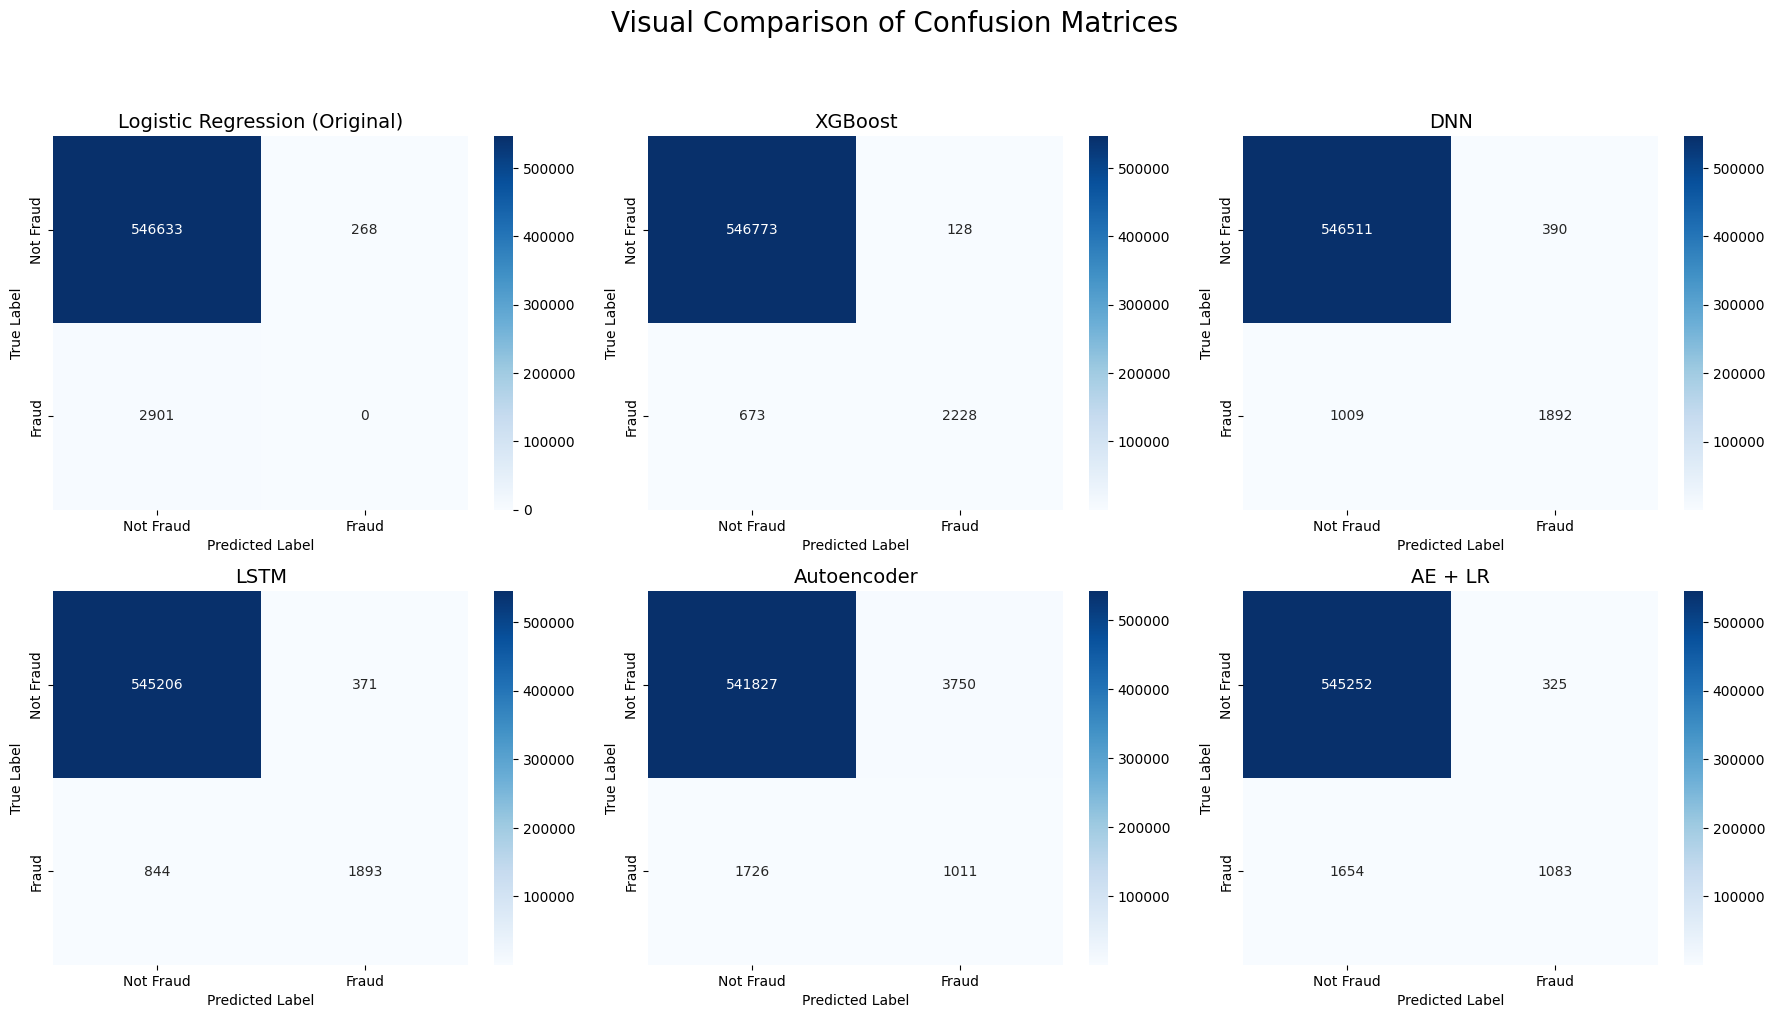

In [45]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# --- We will use the true labels and predicted labels generated earlier for each model ---

# Create a list containing the necessary data for each model
# Each tuple is (model_name, y_true, y_pred)
model_results = [
    ("Logistic Regression (Original)", y_test, y_pred_lr),
    ("XGBoost", y_test, y_pred_xgb),
    ("DNN", y_test, y_pred_dnn),
    ("LSTM", y_test_seq_labels, y_pred_lstm),
    ("Autoencoder", y_test_seq_labels, y_pred_ae),
    ("AE + LR", y_test_seq_labels, y_pred_lr_enhanced)
]

# --- Loop through each model's results and print its confusion matrix ---

print("="*50)
print("             Confusion Matrix for Each Model")
print("="*50)

# Create a subplot grid for visual comparison
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.flatten()

for i, (model_name, y_true, y_pred) in enumerate(model_results):
    print(f"\n\n--- {model_name} ---")
    
    # Calculate the confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    # Print the standard matrix
    print("Confusion Matrix:")
    print(cm)
    
    # Unpack the values for detailed printing
    try:
        tn, fp, fn, tp = cm.ravel()
        print("\nBreakdown:")
        print(f"  - True Negatives (TN): {tn} (Correctly identified as Not Fraud)")
        print(f"  - False Positives (FP): {fp} (Incorrectly identified as Fraud)")
        print(f"  - False Negatives (FN): {fn} (Fraud transactions MISSED)")
        print(f"  - True Positives (TP): {tp} (Correctly identified as Fraud)")
    except ValueError:
        print("\nCould not unpack matrix. It might be a 1x1 matrix if only one class was predicted.")

    # Plot the heatmap on the corresponding subplot
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i], 
                xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
    axes[i].set_title(model_name, fontsize=14)
    axes[i].set_xlabel('Predicted Label')
    axes[i].set_ylabel('True Label')

# Hide any unused subplots
for j in range(len(model_results), len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Visual Comparison of Confusion Matrices", fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

     Individual Confusion Matrix for Each Model


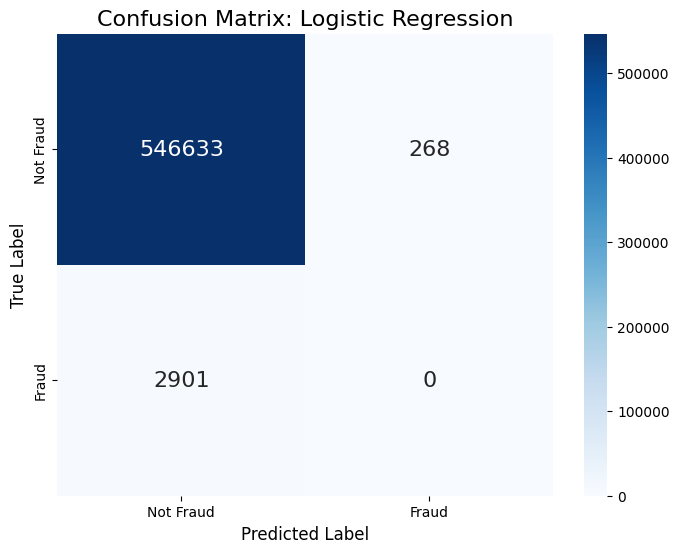


--- Logistic Regression Breakdown ---
  - True Negatives (TN): 546633
  - False Positives (FP): 268
  - False Negatives (FN): 2901  <-- Critical Metric
  - True Positives (TP): 0
------------------------------


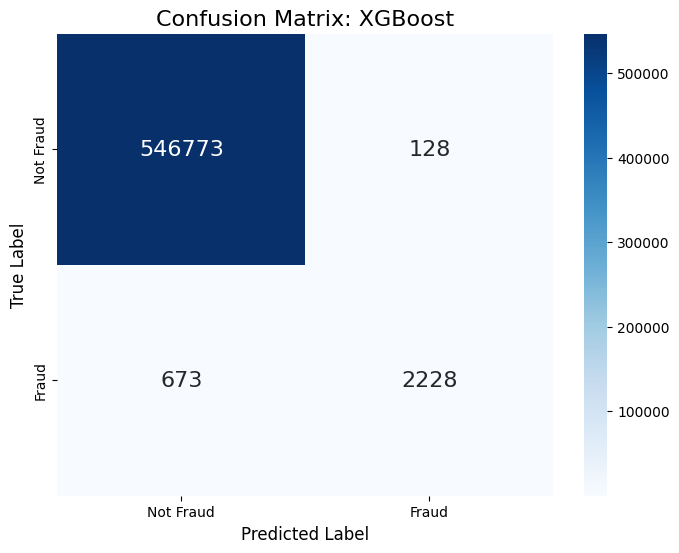


--- XGBoost Breakdown ---
  - True Negatives (TN): 546773
  - False Positives (FP): 128
  - False Negatives (FN): 673  <-- Critical Metric
  - True Positives (TP): 2228
------------------------------


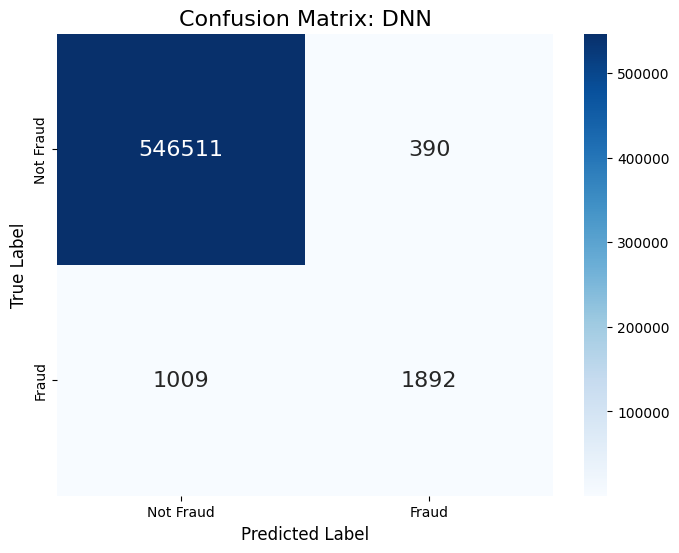


--- DNN Breakdown ---
  - True Negatives (TN): 546511
  - False Positives (FP): 390
  - False Negatives (FN): 1009  <-- Critical Metric
  - True Positives (TP): 1892
------------------------------


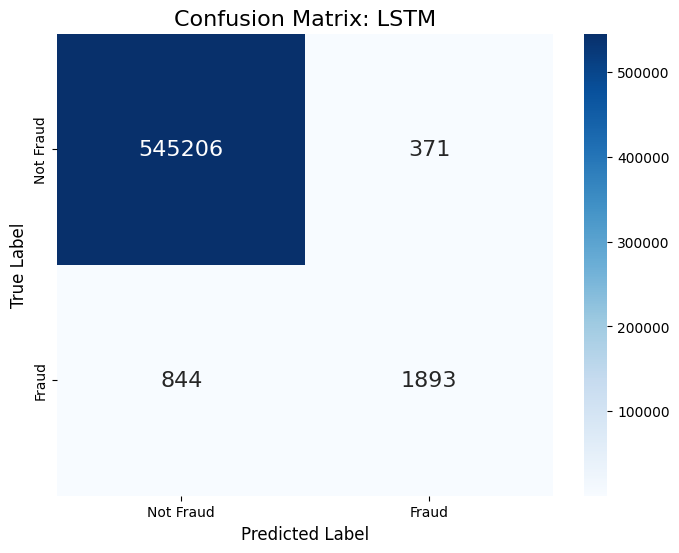


--- LSTM Breakdown ---
  - True Negatives (TN): 545206
  - False Positives (FP): 371
  - False Negatives (FN): 844  <-- Critical Metric
  - True Positives (TP): 1893
------------------------------


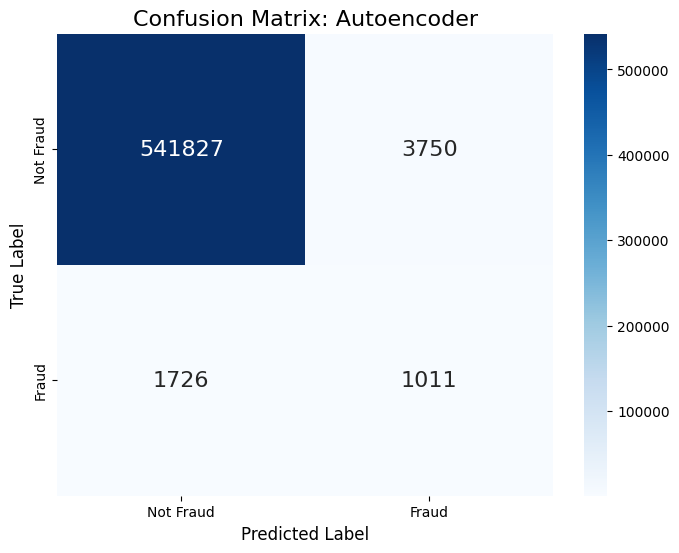


--- Autoencoder Breakdown ---
  - True Negatives (TN): 541827
  - False Positives (FP): 3750
  - False Negatives (FN): 1726  <-- Critical Metric
  - True Positives (TP): 1011
------------------------------


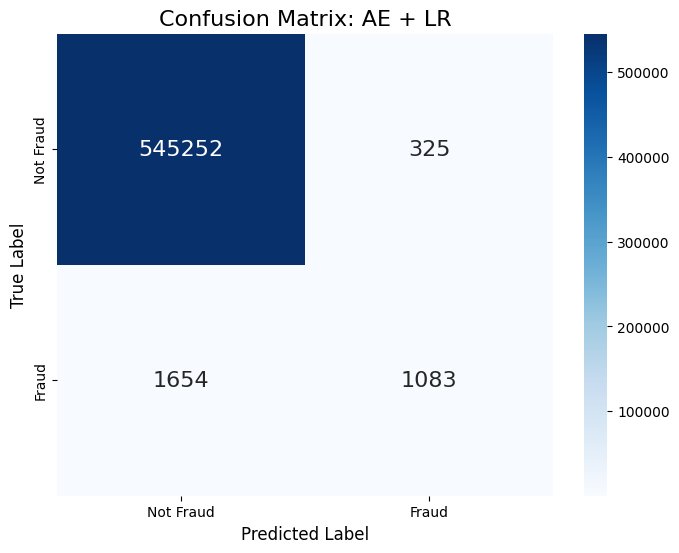


--- AE + LR Breakdown ---
  - True Negatives (TN): 545252
  - False Positives (FP): 325
  - False Negatives (FN): 1654  <-- Critical Metric
  - True Positives (TP): 1083
------------------------------


In [46]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# --- We will use the true labels and predicted labels generated earlier for each model ---

# Create a list containing the necessary data for each model
# Each tuple is (model_name, y_true, y_pred)
model_results = [
    ("Logistic Regression", y_test, y_pred_lr),
    ("XGBoost", y_test, y_pred_xgb),
    ("DNN", y_test, y_pred_dnn),
    ("LSTM", y_test_seq_labels, y_pred_lstm),
    ("Autoencoder", y_test_seq_labels, y_pred_ae),
    ("AE + LR", y_test_seq_labels, y_pred_lr_enhanced)
]

# --- Loop through each model's results and generate a separate plot ---

print("="*50)
print("     Individual Confusion Matrix for Each Model")
print("="*50)


for model_name, y_true, y_pred in model_results:
    # --- Create a new figure for each plot ---
    # This ensures each confusion matrix is its own image.
    plt.figure(figsize=(8, 6))
    
    # Calculate the confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    # Create the heatmap
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Not Fraud', 'Fraud'], 
                yticklabels=['Not Fraud', 'Fraud'],
                annot_kws={"size": 16}) # Increase font size for readability
    
    plt.title(f'Confusion Matrix: {model_name}', fontsize=16)
    plt.xlabel('Predicted Label', fontsize=12)
    plt.ylabel('True Label', fontsize=12)
    
    # Display the plot. A new image will be generated for each iteration.
    plt.show()
    
    # --- Also print the text breakdown for clarity ---
    print(f"\n--- {model_name} Breakdown ---")
    try:
        tn, fp, fn, tp = cm.ravel()
        print(f"  - True Negatives (TN): {tn}")
        print(f"  - False Positives (FP): {fp}")
        print(f"  - False Negatives (FN): {fn}  <-- Critical Metric")
        print(f"  - True Positives (TP): {tp}")
        print("-" * 30)
    except ValueError:
        print("Could not unpack matrix. It might be a 1x1 matrix if only one class was predicted.")

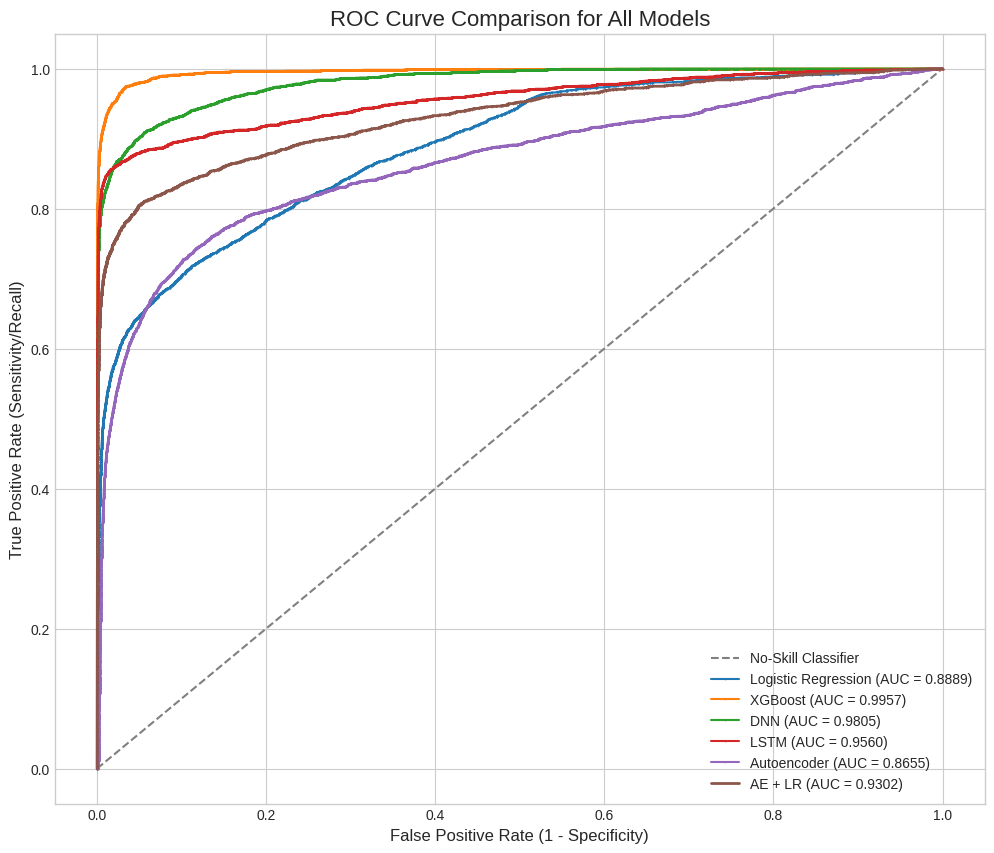

In [47]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# --- Create a single plot for all ROC Curves ---
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(12, 10))

# --- Plot the "No-Skill" line (a random classifier) ---
plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='No-Skill Classifier')


# --- Plotting each model's ROC curve ---

# Model 1: Logistic Regression (Original)
fpr, tpr, _ = roc_curve(y_test, y_score_lr)
auc = roc_auc_score(y_test, y_score_lr)
plt.plot(fpr, tpr, marker='.', markersize=0.5, label=f'Logistic Regression (AUC = {auc:.4f})')

# Model 2: XGBoost
fpr, tpr, _ = roc_curve(y_test, y_score_xgb)
auc = roc_auc_score(y_test, y_score_xgb)
plt.plot(fpr, tpr, marker='.', markersize=0.5, label=f'XGBoost (AUC = {auc:.4f})')

# Model 3: DNN
fpr, tpr, _ = roc_curve(y_test, y_score_dnn)
auc = roc_auc_score(y_test, y_score_dnn)
plt.plot(fpr, tpr, marker='.', markersize=0.5, label=f'DNN (AUC = {auc:.4f})')

# Model 4: LSTM
# Note: Using the sequence labels (y_test_seq_labels)
fpr, tpr, _ = roc_curve(y_test_seq_labels, y_score_lstm)
auc = roc_auc_score(y_test_seq_labels, y_score_lstm)
plt.plot(fpr, tpr, marker='.', markersize=0.5, label=f'LSTM (AUC = {auc:.4f})')

# Model 5: Autoencoder
# Note: Using the sequence labels
fpr, tpr, _ = roc_curve(y_test_seq_labels, y_score_ae)
auc = roc_auc_score(y_test_seq_labels, y_score_ae)
plt.plot(fpr, tpr, marker='.', markersize=0.5, label=f'Autoencoder (AUC = {auc:.4f})')

# Model 7: Logistic Regression (Enhanced)
# Note: Using the sequence labels
fpr, tpr, _ = roc_curve(y_test_seq_labels, y_score_lr_enhanced)
auc = roc_auc_score(y_test_seq_labels, y_score_lr_enhanced)
plt.plot(fpr, tpr, marker='.', markersize=0.5, lw=2, label=f'AE + LR (AUC = {auc:.4f})')


# --- Finalize and show the plot ---
plt.title('ROC Curve Comparison for All Models', fontsize=16)
plt.xlabel('False Positive Rate (1 - Specificity)', fontsize=12)
plt.ylabel('True Positive Rate (Sensitivity/Recall)', fontsize=12)
plt.legend(loc='lower right', fontsize=10)
plt.grid(True)
plt.show()